In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, AutoETS
from statsforecast.arima import arima_string

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from src.data.loaders import CommodityLoader
from src.utils.split_series import split_series

In [19]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 
}
plt.rcParams.update(dark_style)
rcParams['figure.figsize'] = (18,7)

In [20]:
df_brl = CommodityLoader.load_all_commodities(currency='BRL', preprocessing=True, monthly_aggregation='mean', limit_date=None)

ദ്ദി・ᴗ・)✧ acucar_santos carregado com sucesso
ദ്ദി・ᴗ・)✧ acucar_sp carregado com sucesso
ദ്ദി・ᴗ・)✧ algodao carregado com sucesso
ദ്ദി・ᴗ・)✧ arroz carregado com sucesso
ദ്ദി・ᴗ・)✧ cafe_arabica carregado com sucesso
ദ്ദി・ᴗ・)✧ cafe_robusta carregado com sucesso
ദ്ദി・ᴗ・)✧ milho carregado com sucesso
ദ്ദി・ᴗ・)✧ soja_parana carregado com sucesso
ദ്ദി・ᴗ・)✧ soja_paranagua carregado com sucesso
ദ്ദി・ᴗ・)✧ trigo_parana carregado com sucesso
ദ്ദി・ᴗ・)✧ trigo_rs carregado com sucesso


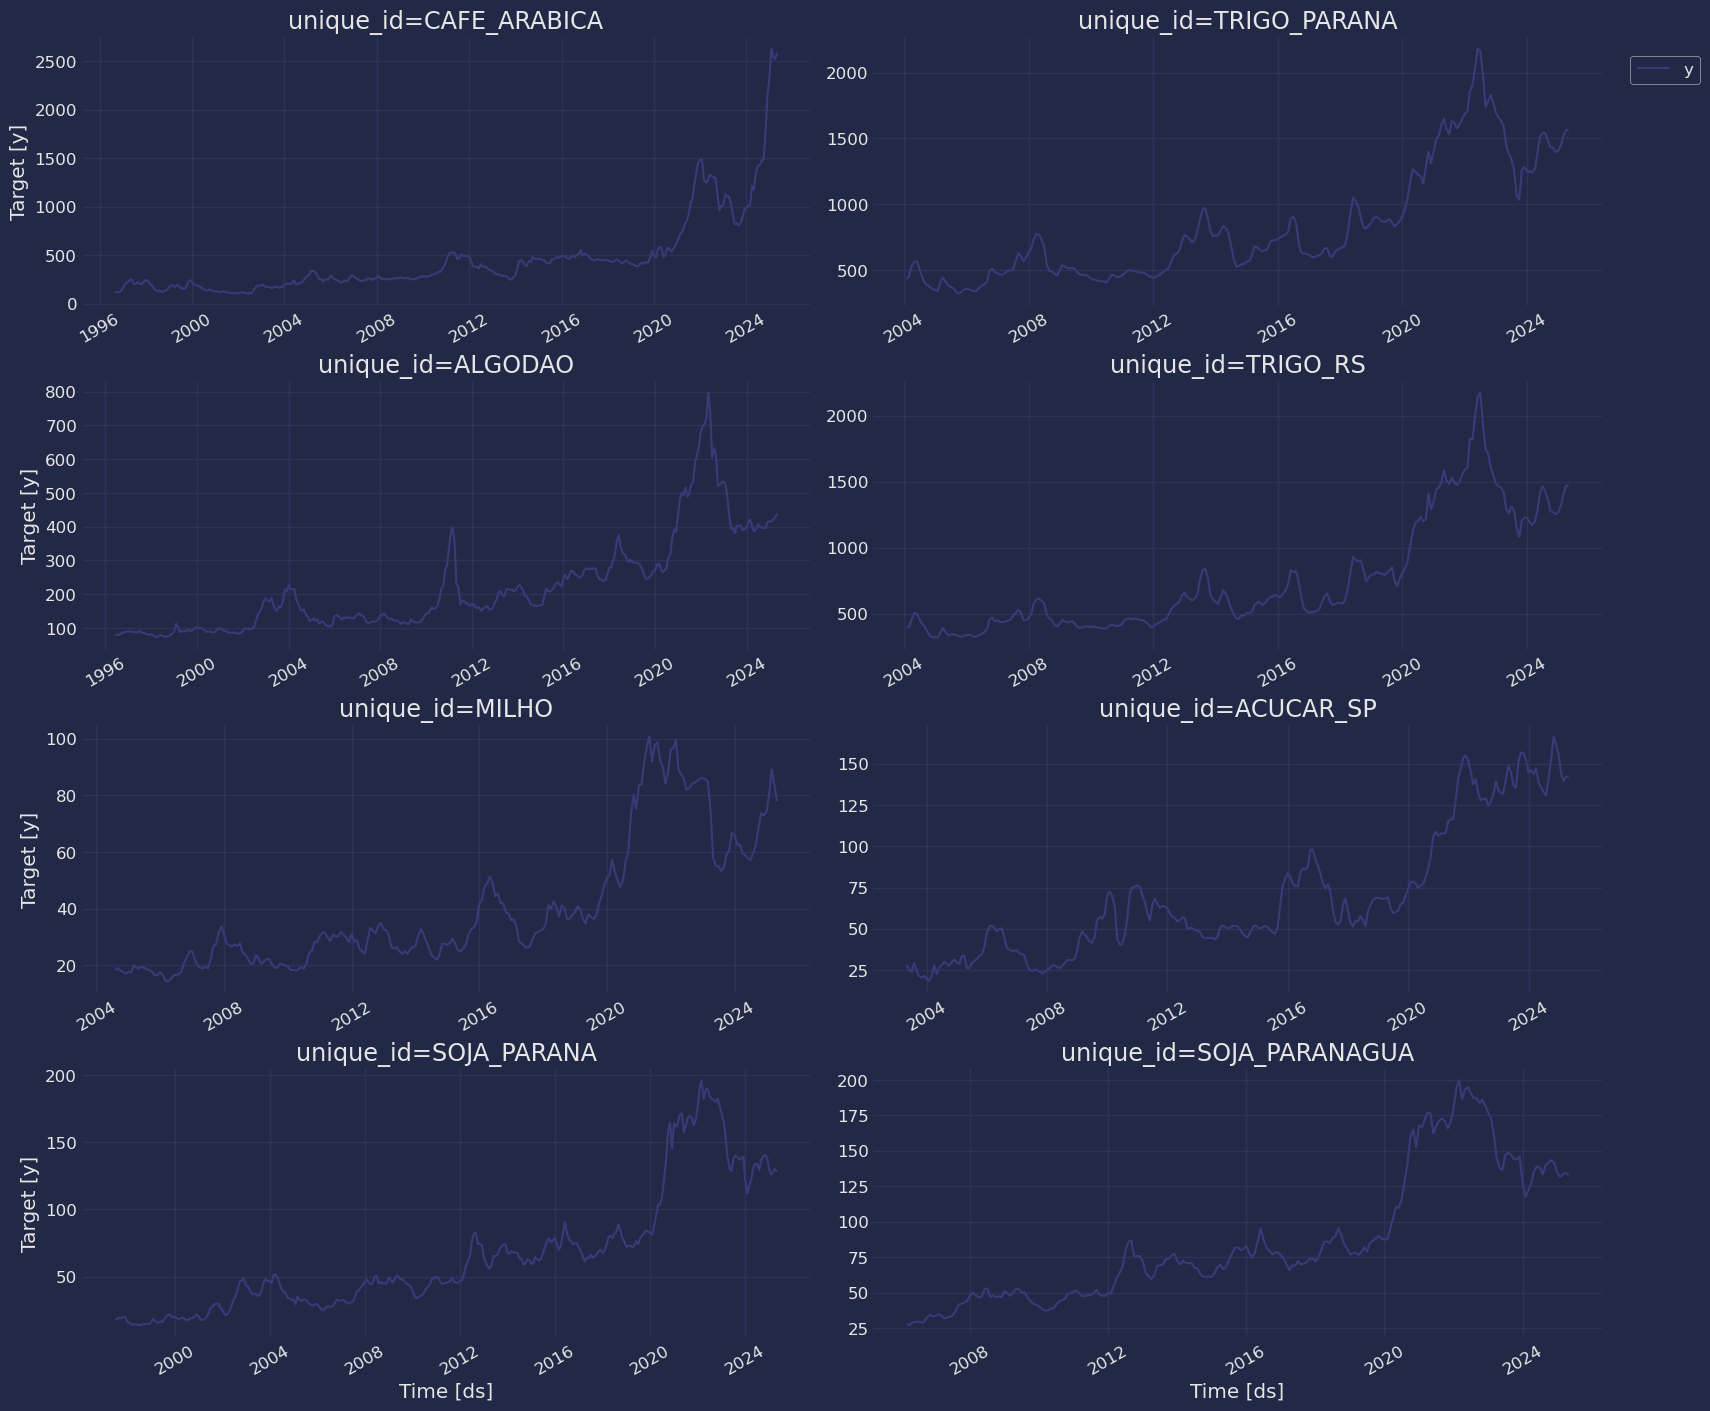

In [21]:
StatsForecast.plot(df_brl)

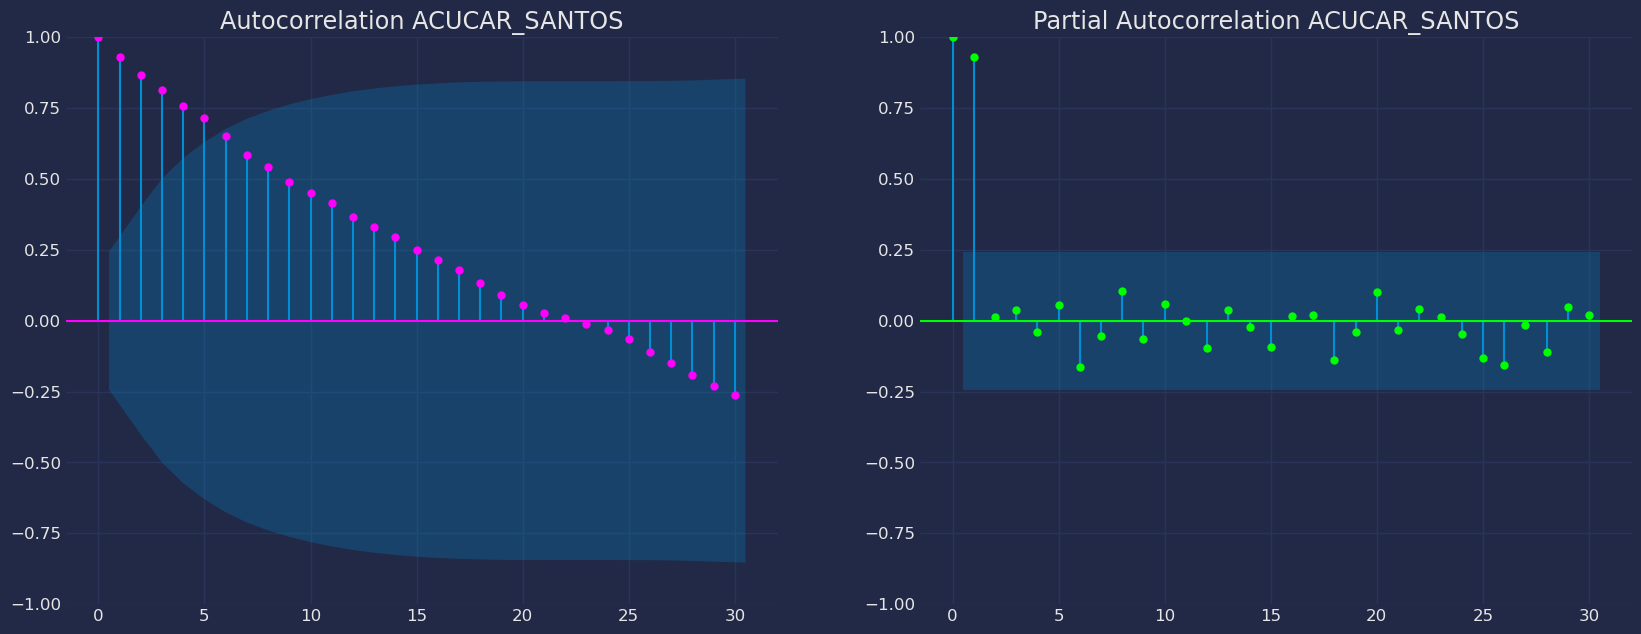

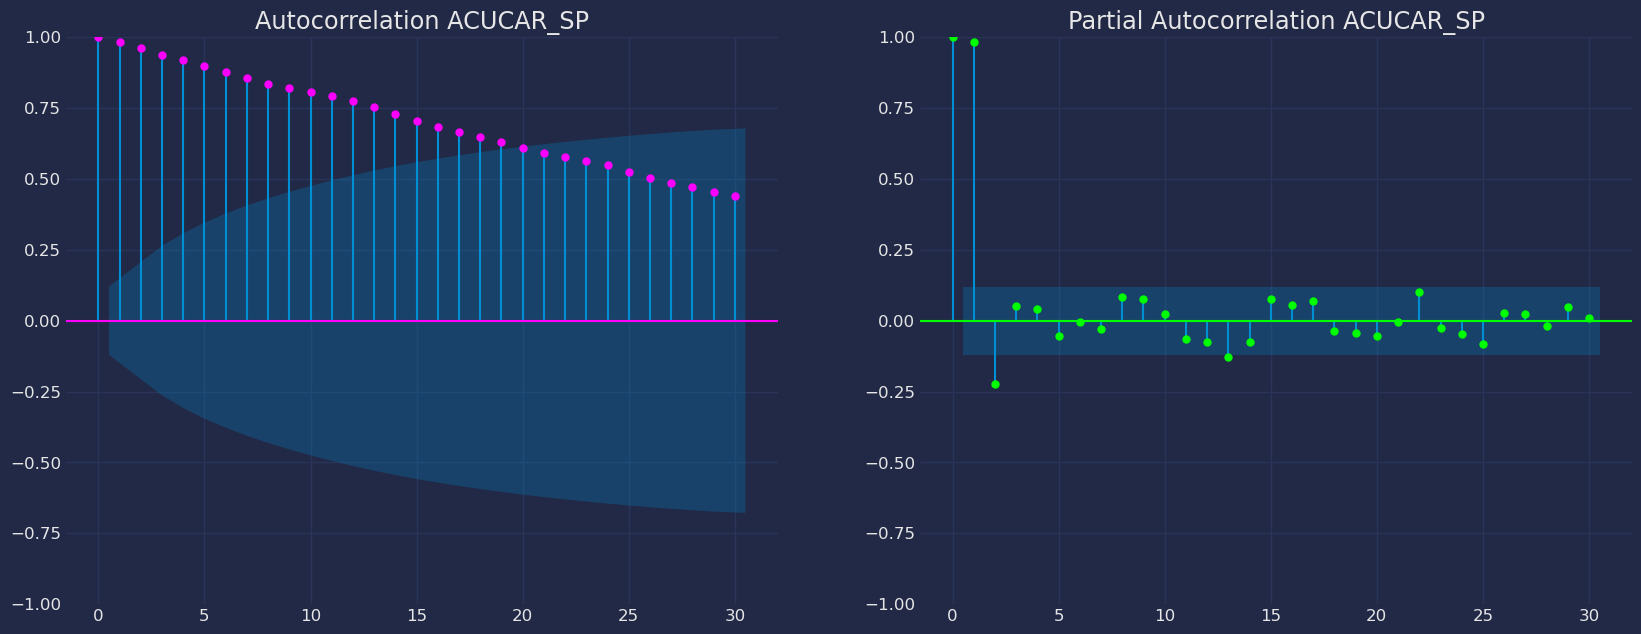

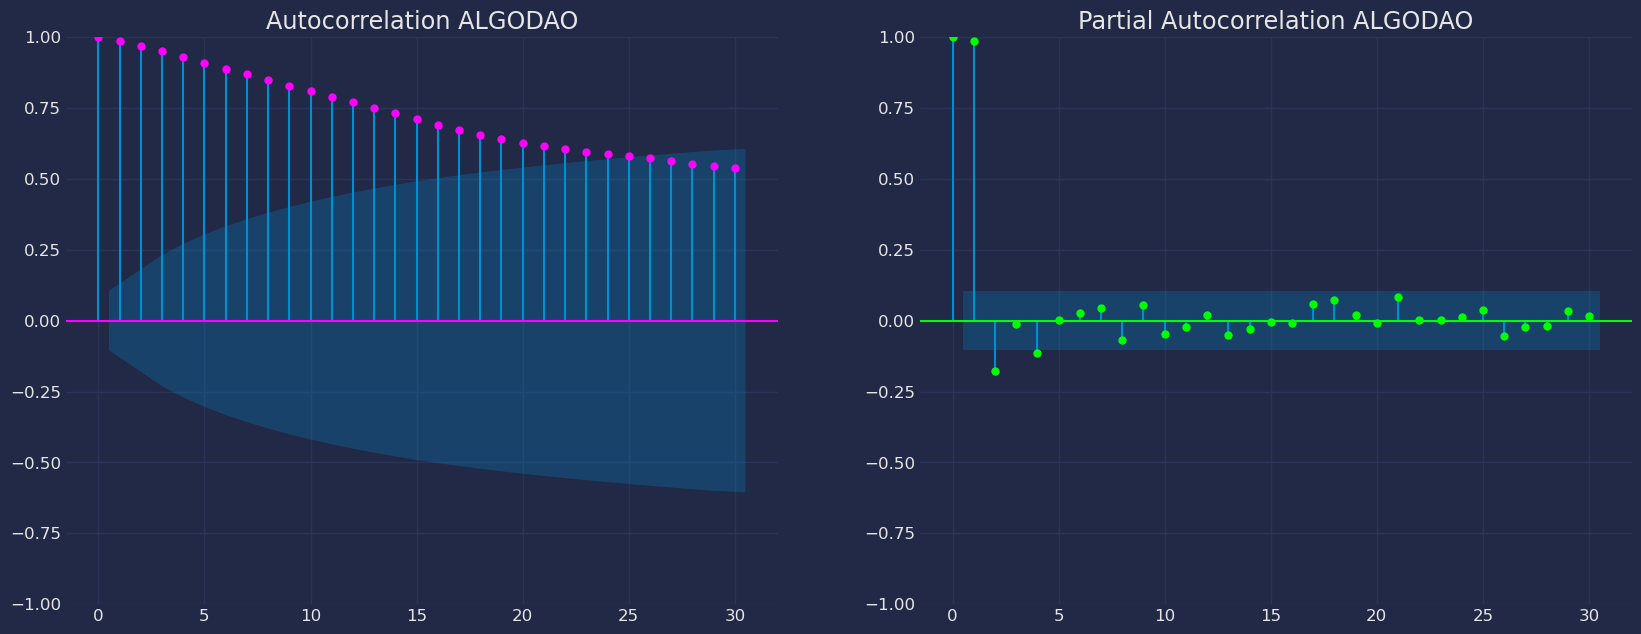

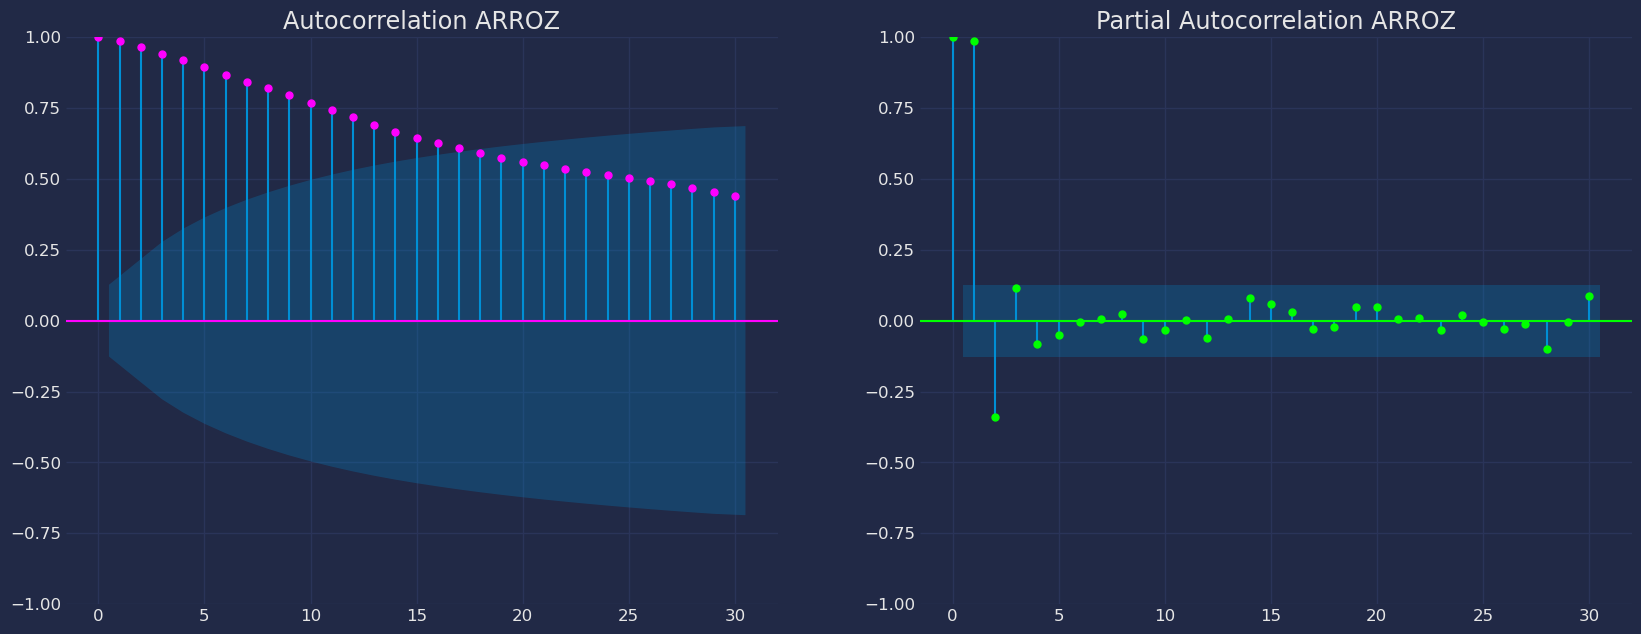

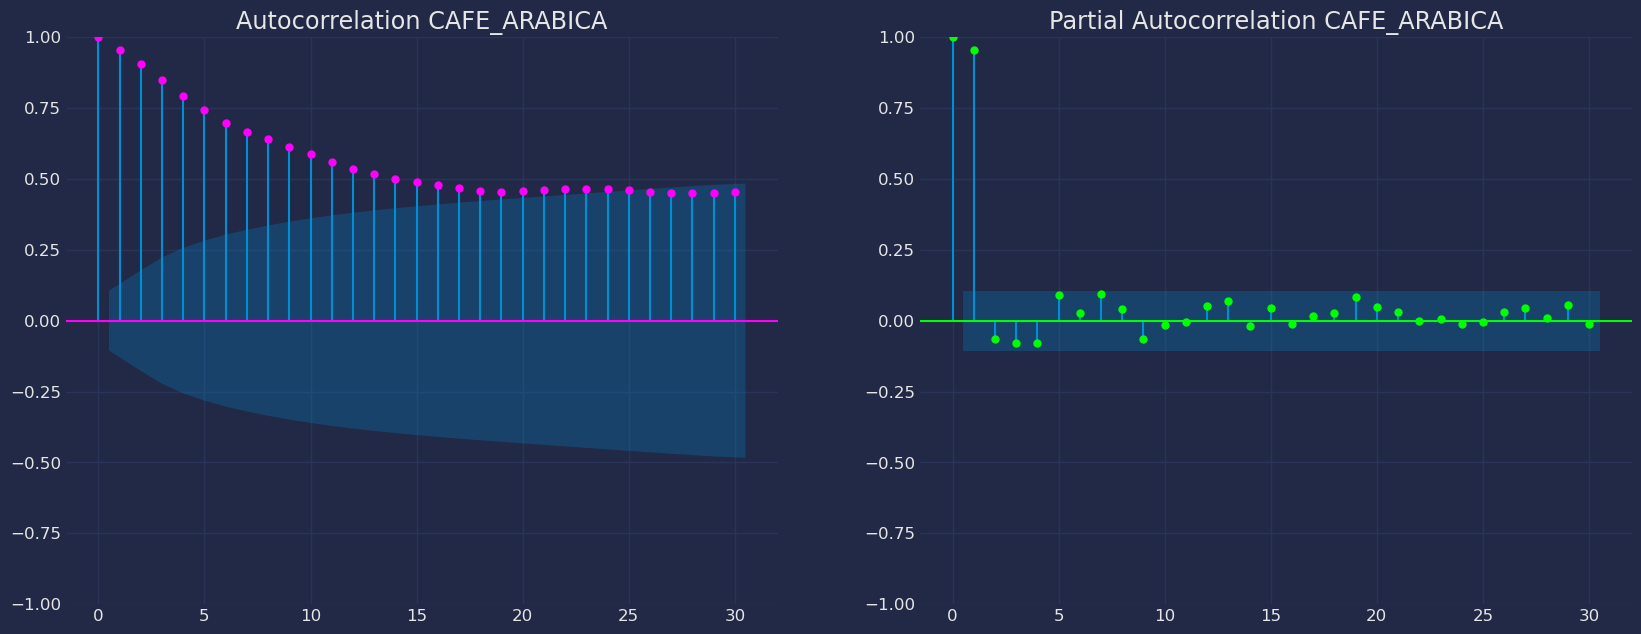

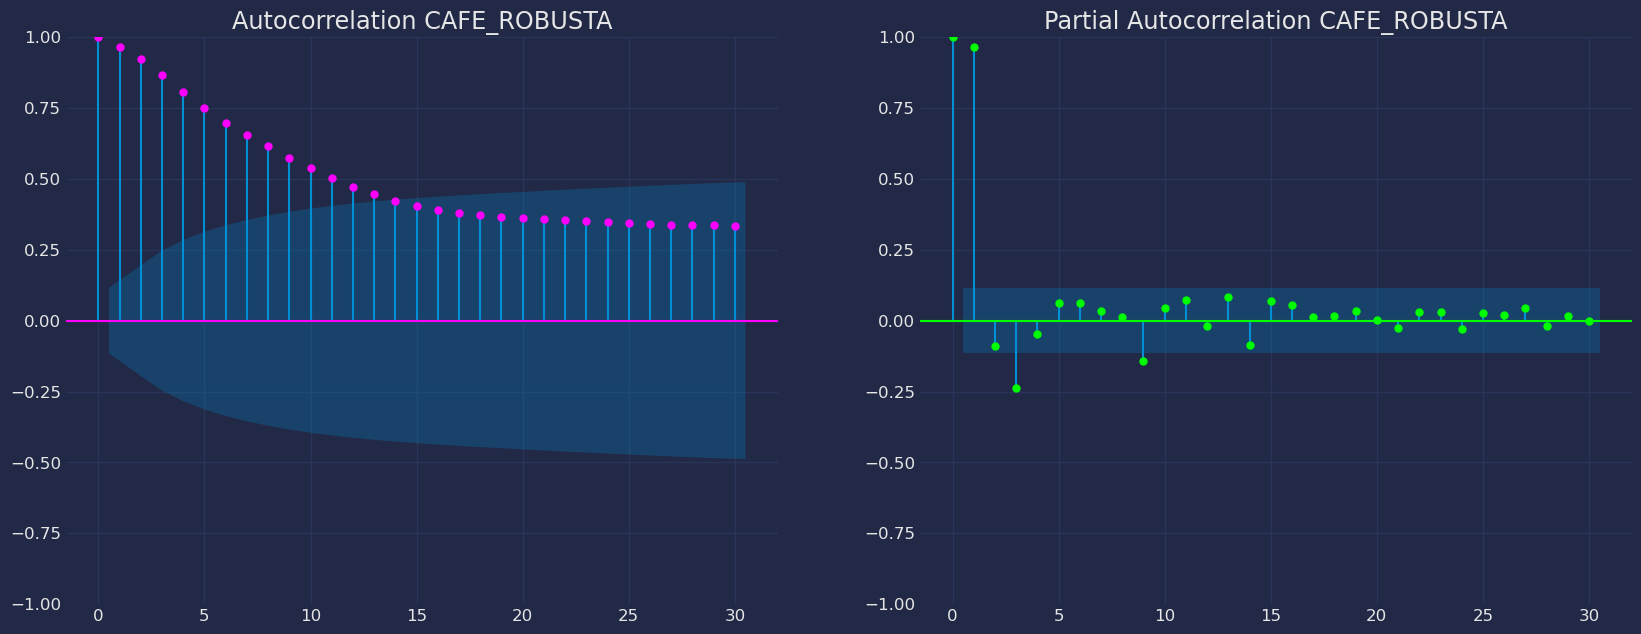

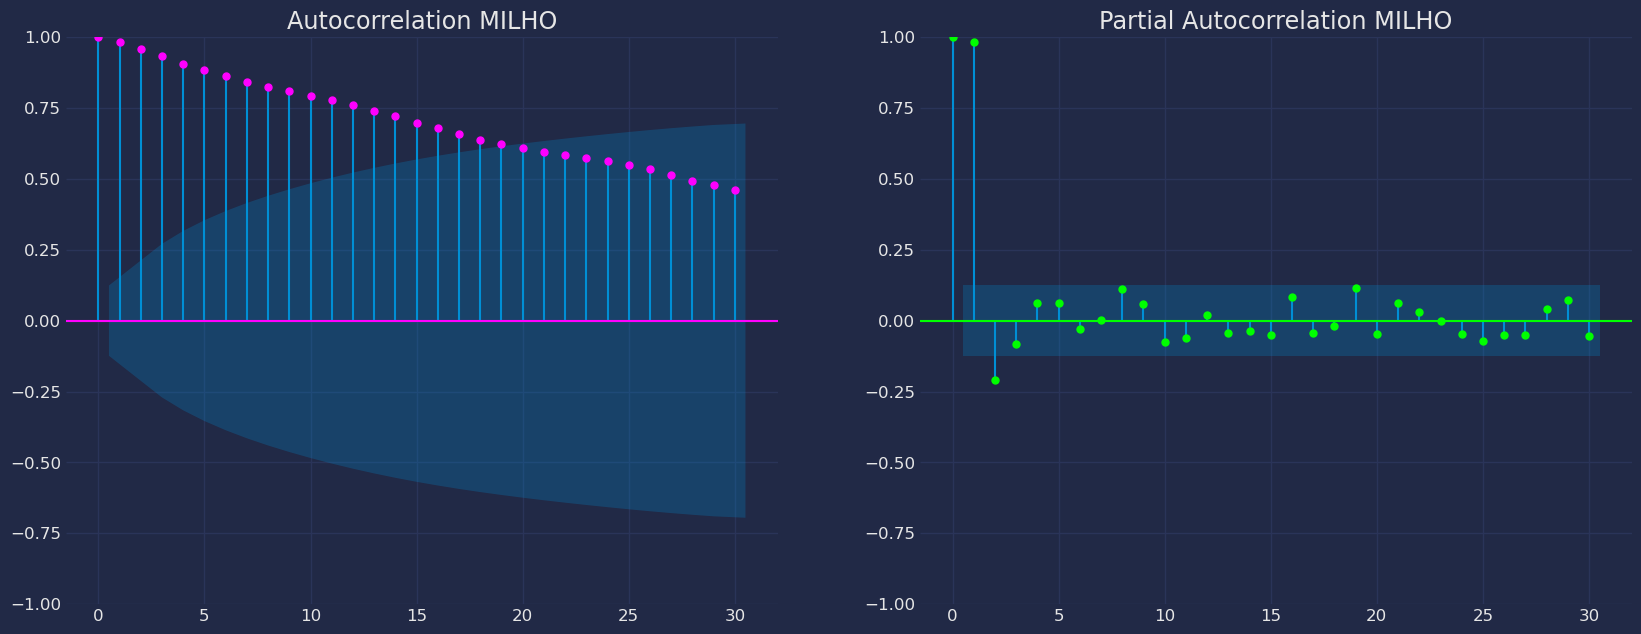

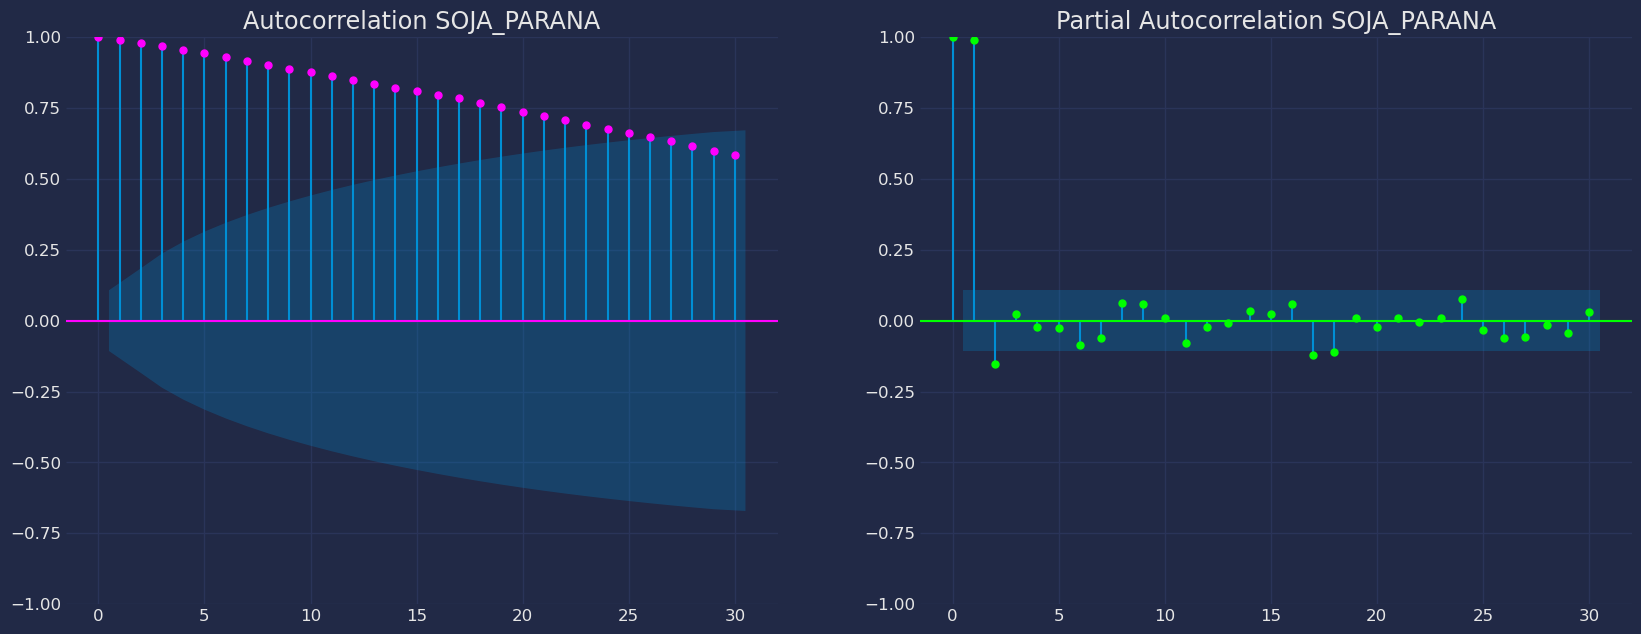

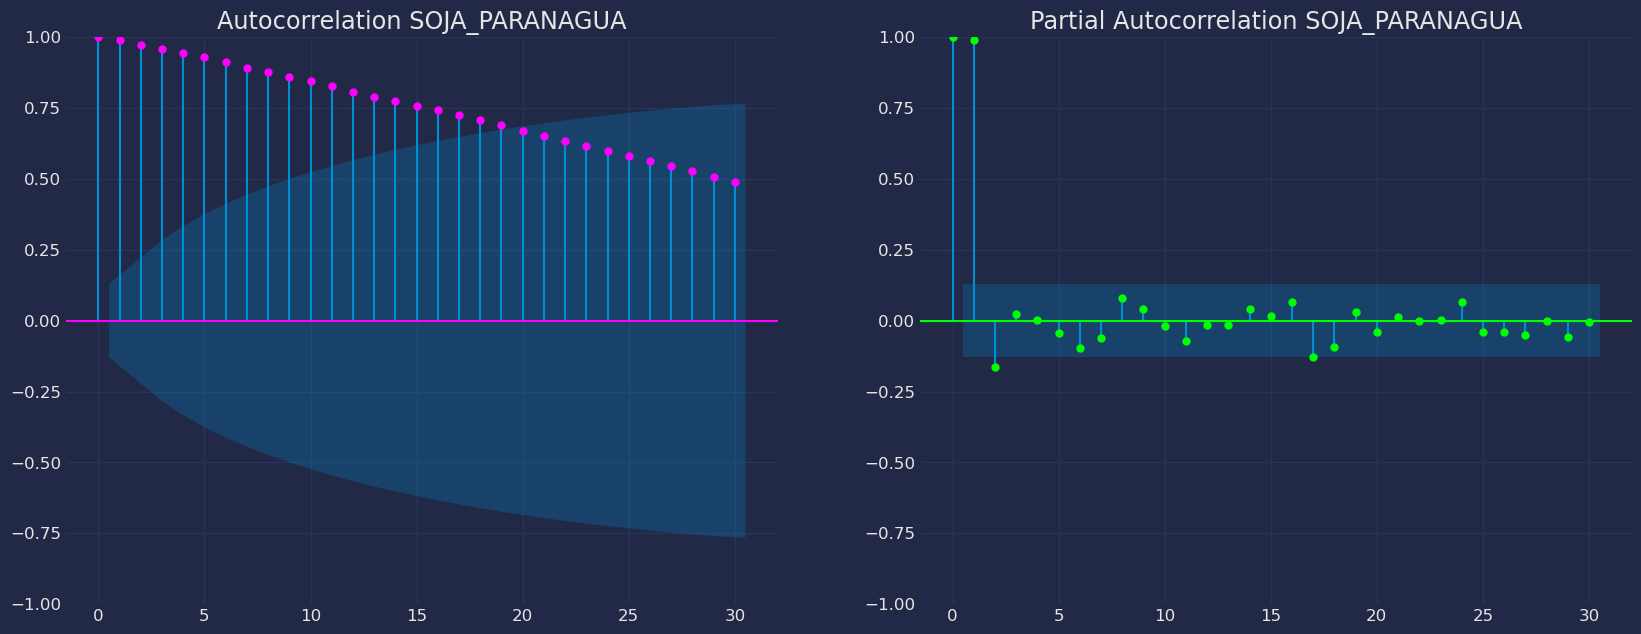

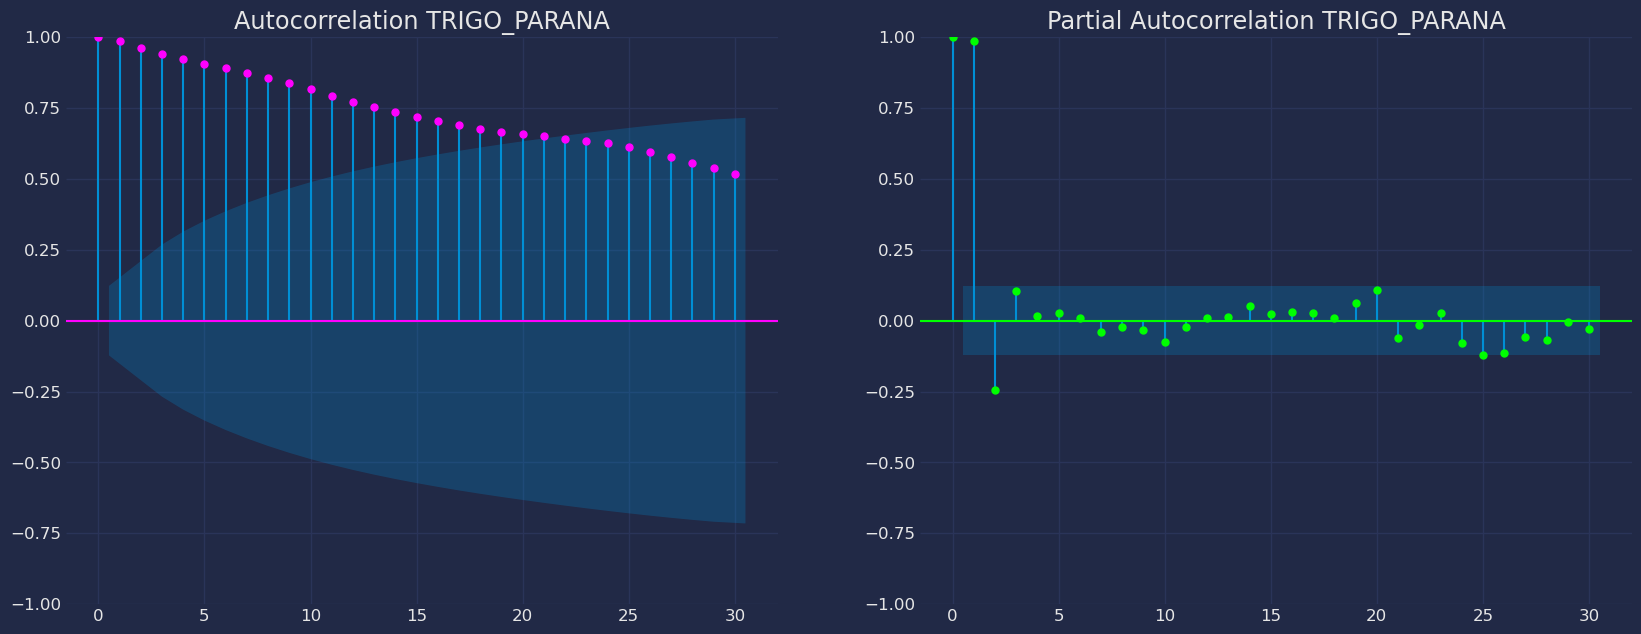

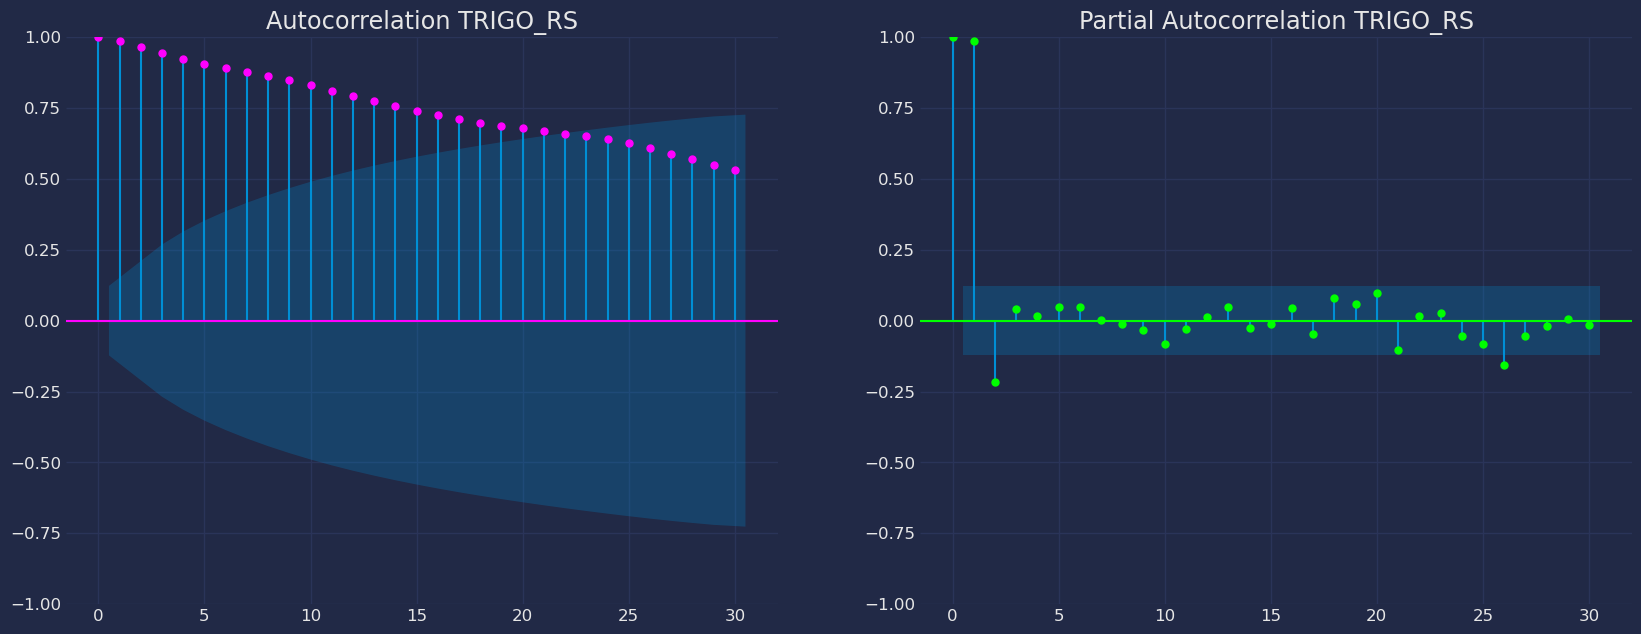

In [22]:
for u in df_brl['unique_id'].unique():
    fig, axs = plt.subplots(nrows=1, ncols=2)

    plot_acf(df_brl[df_brl['unique_id'] == u]["y"],  lags=30, ax=axs[0],color="fuchsia")
    axs[0].set_title(f'Autocorrelation {u}');

    plot_pacf(df_brl[df_brl['unique_id'] == u]["y"],  lags=30, ax=axs[1],color="lime")
    axs[1].set_title(f'Partial Autocorrelation {u}')

    plt.show();

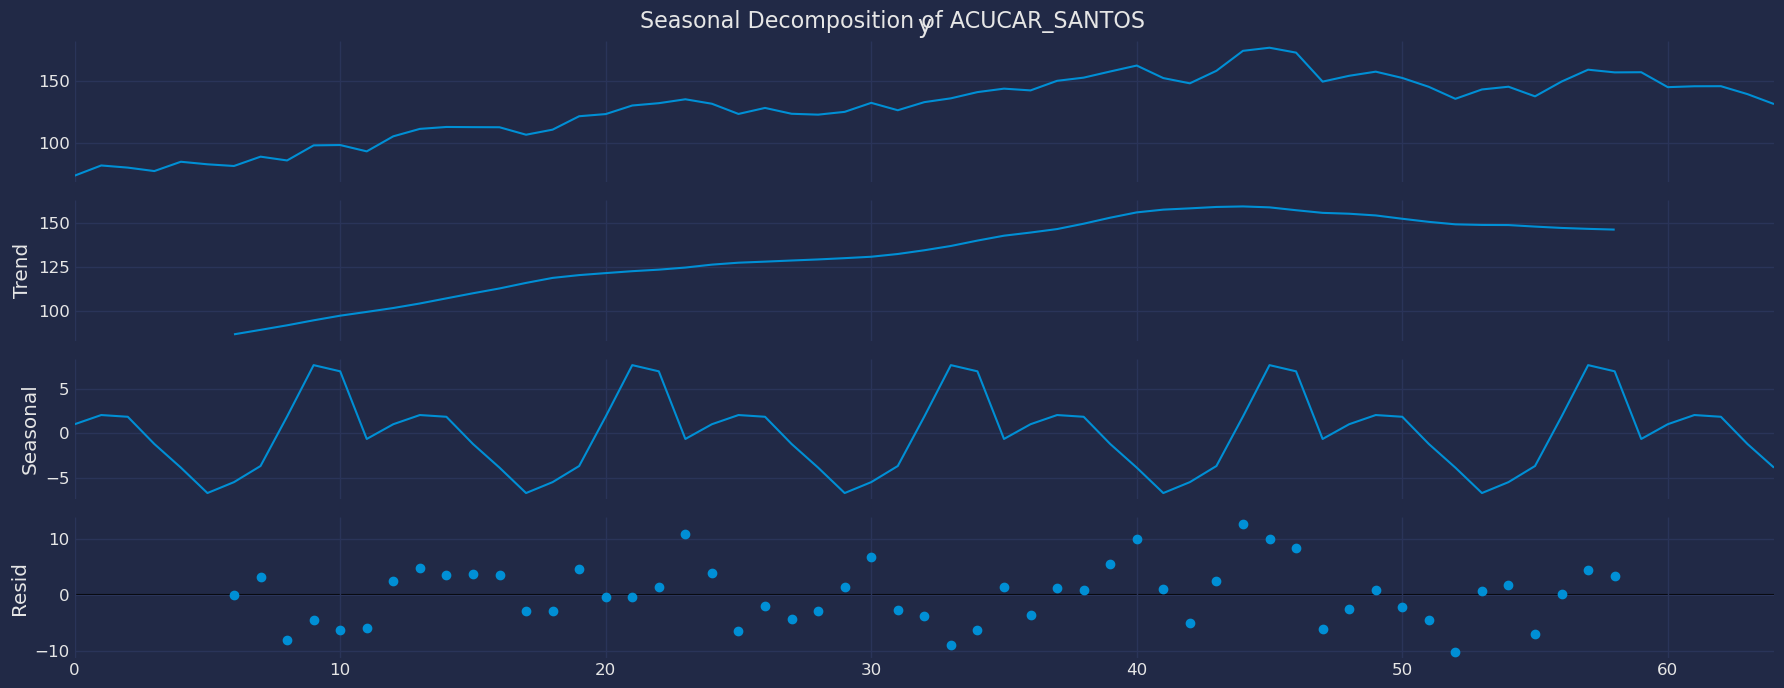

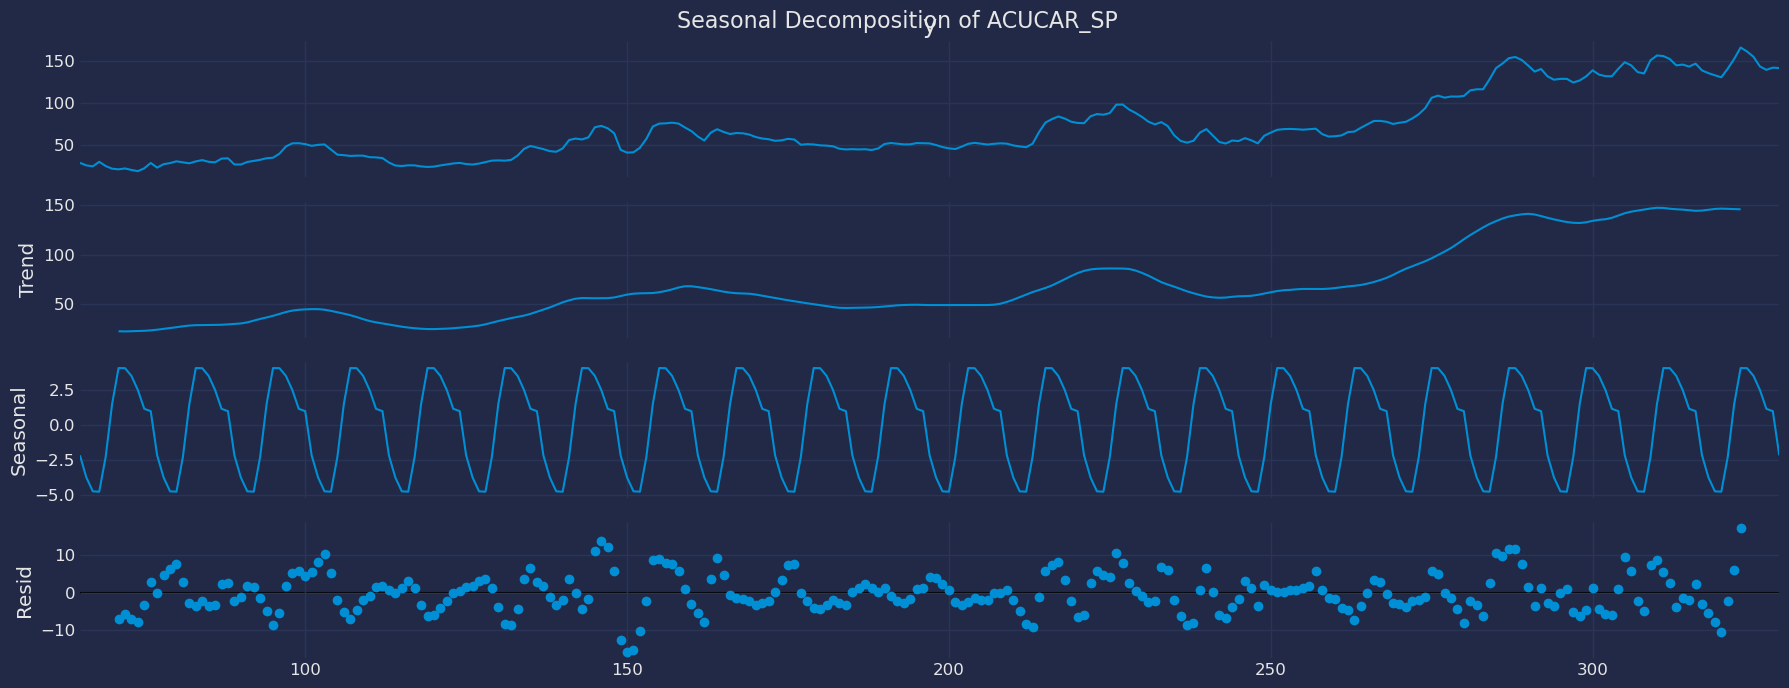

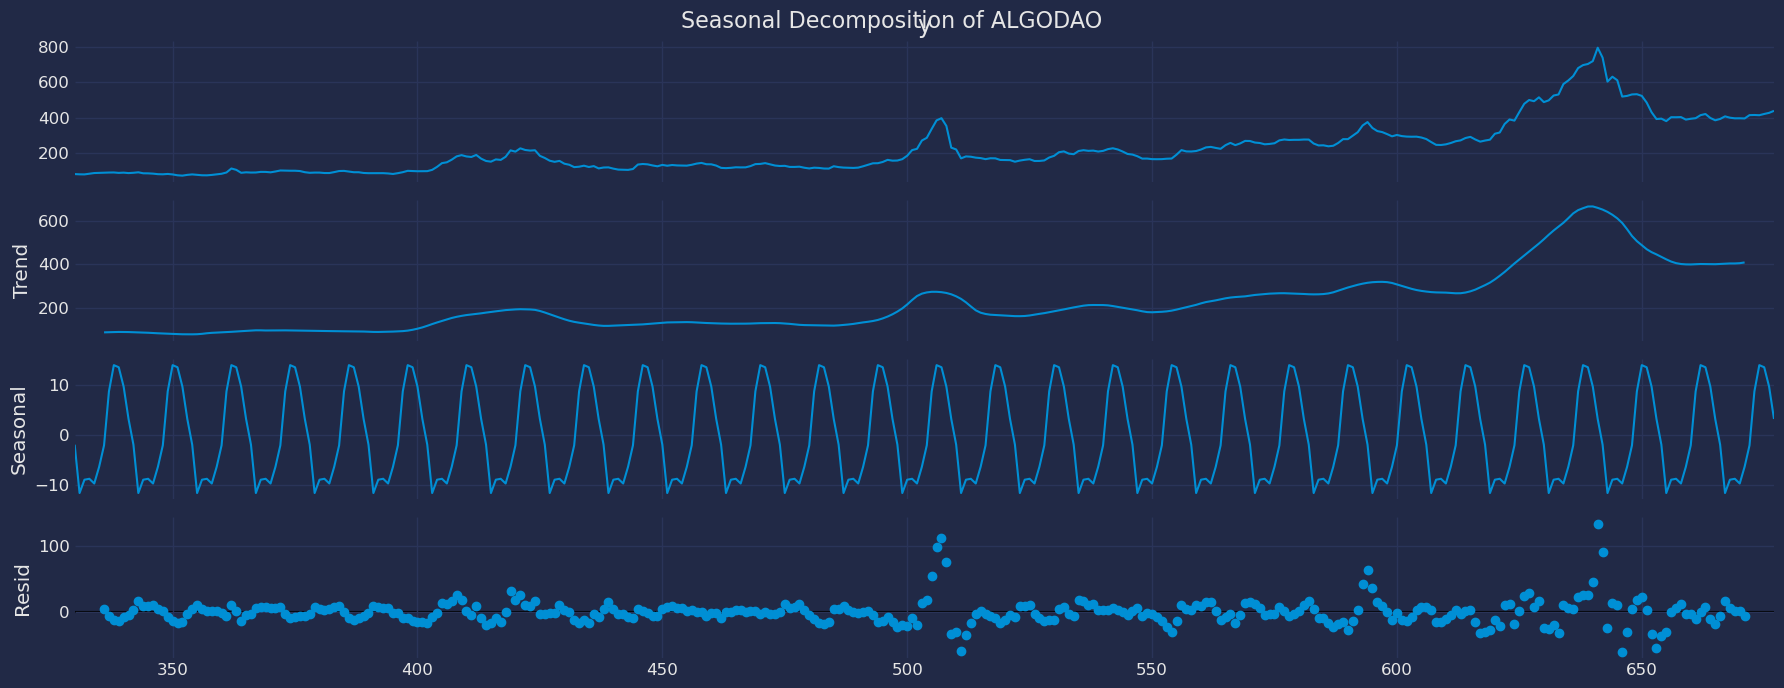

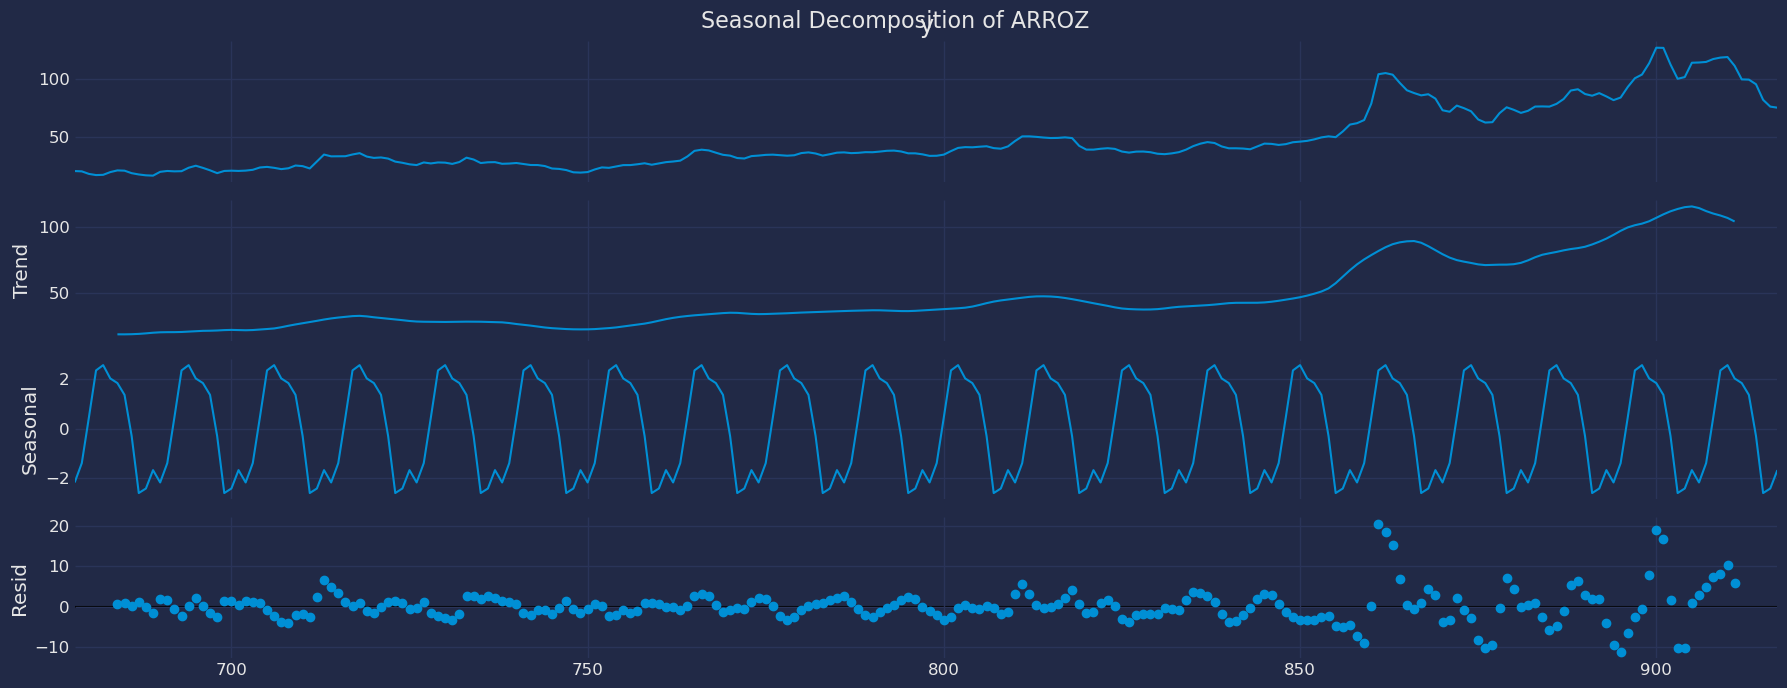

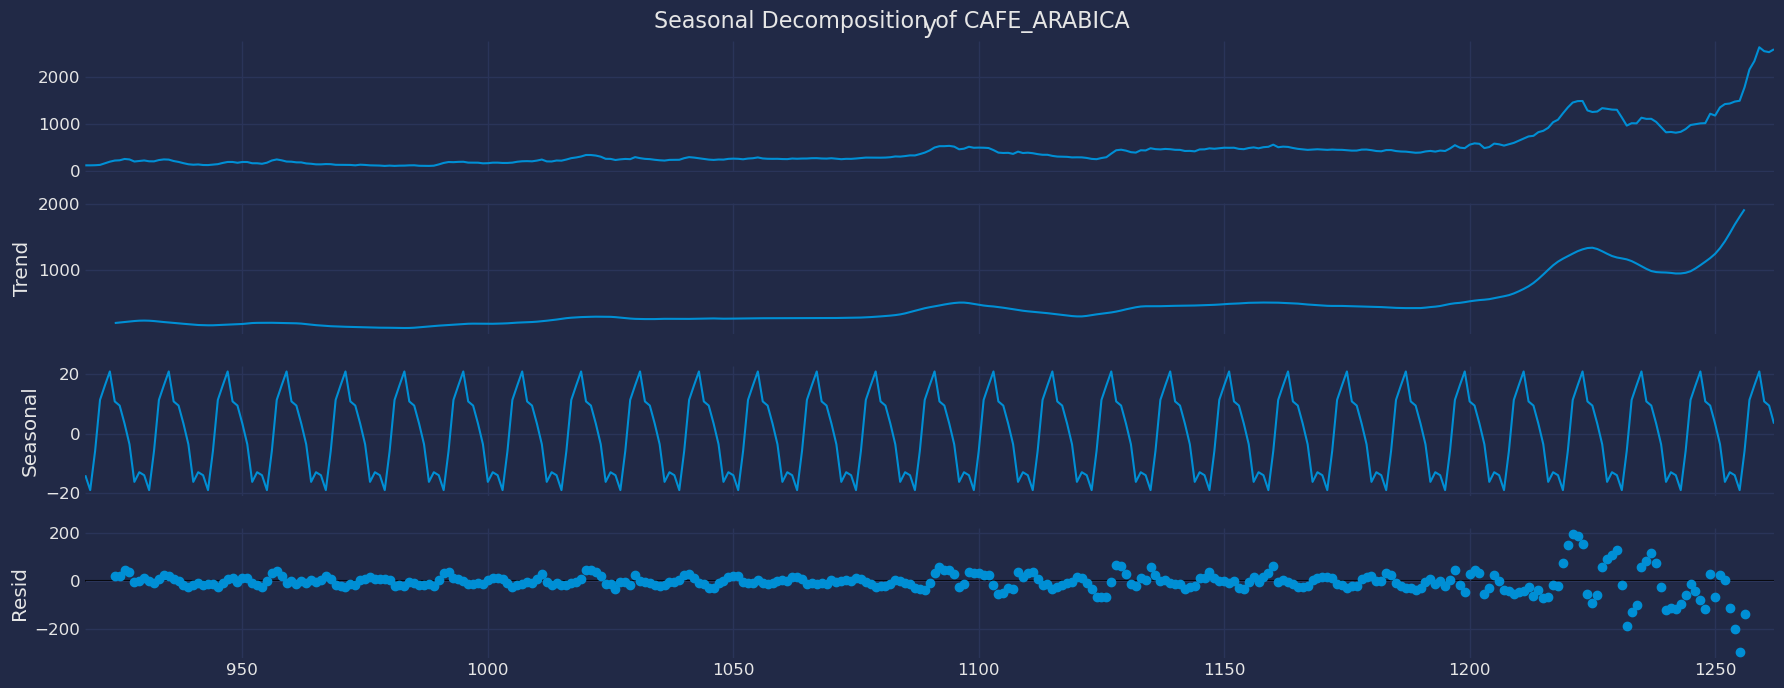

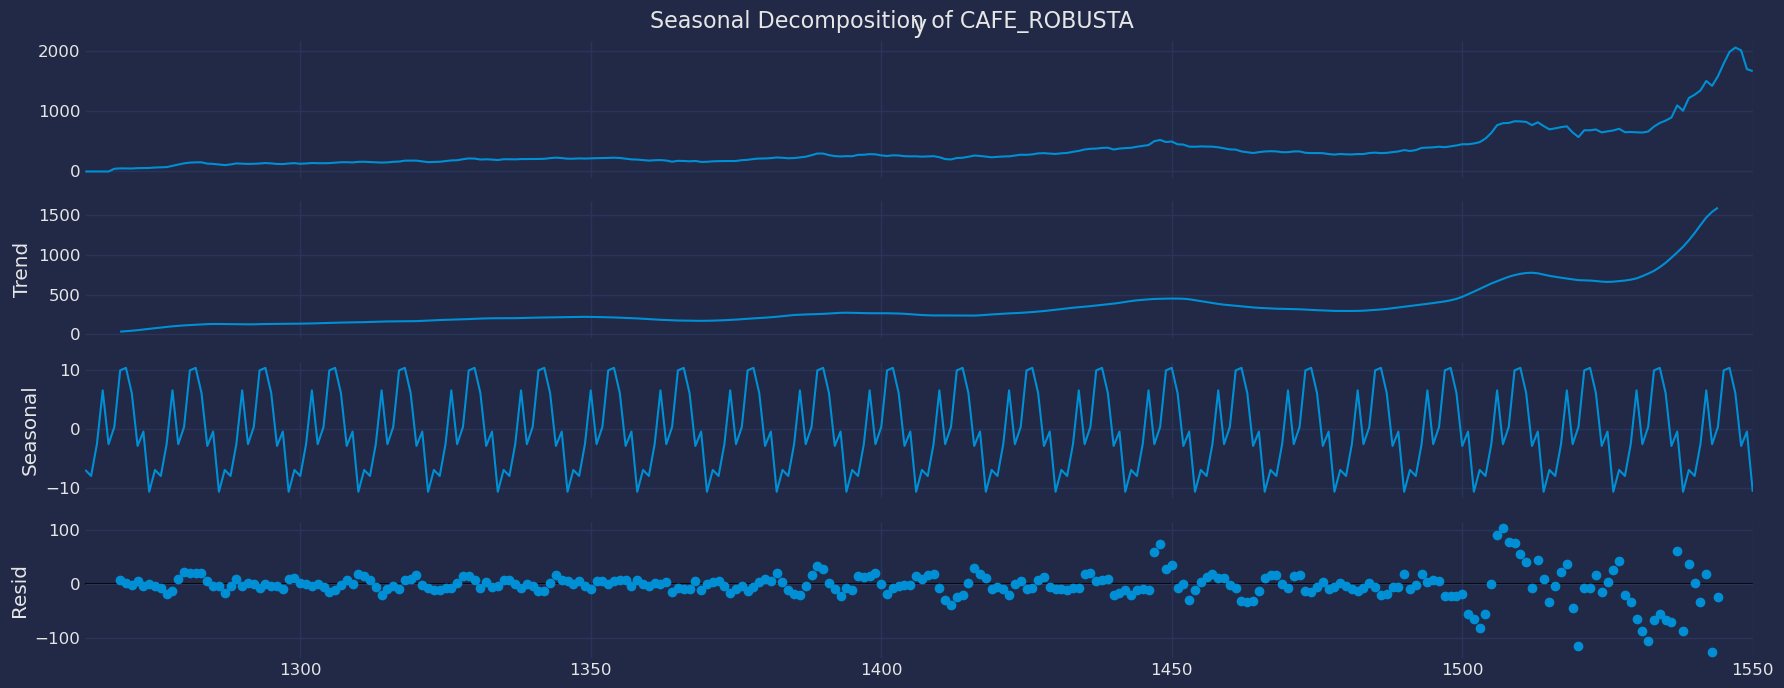

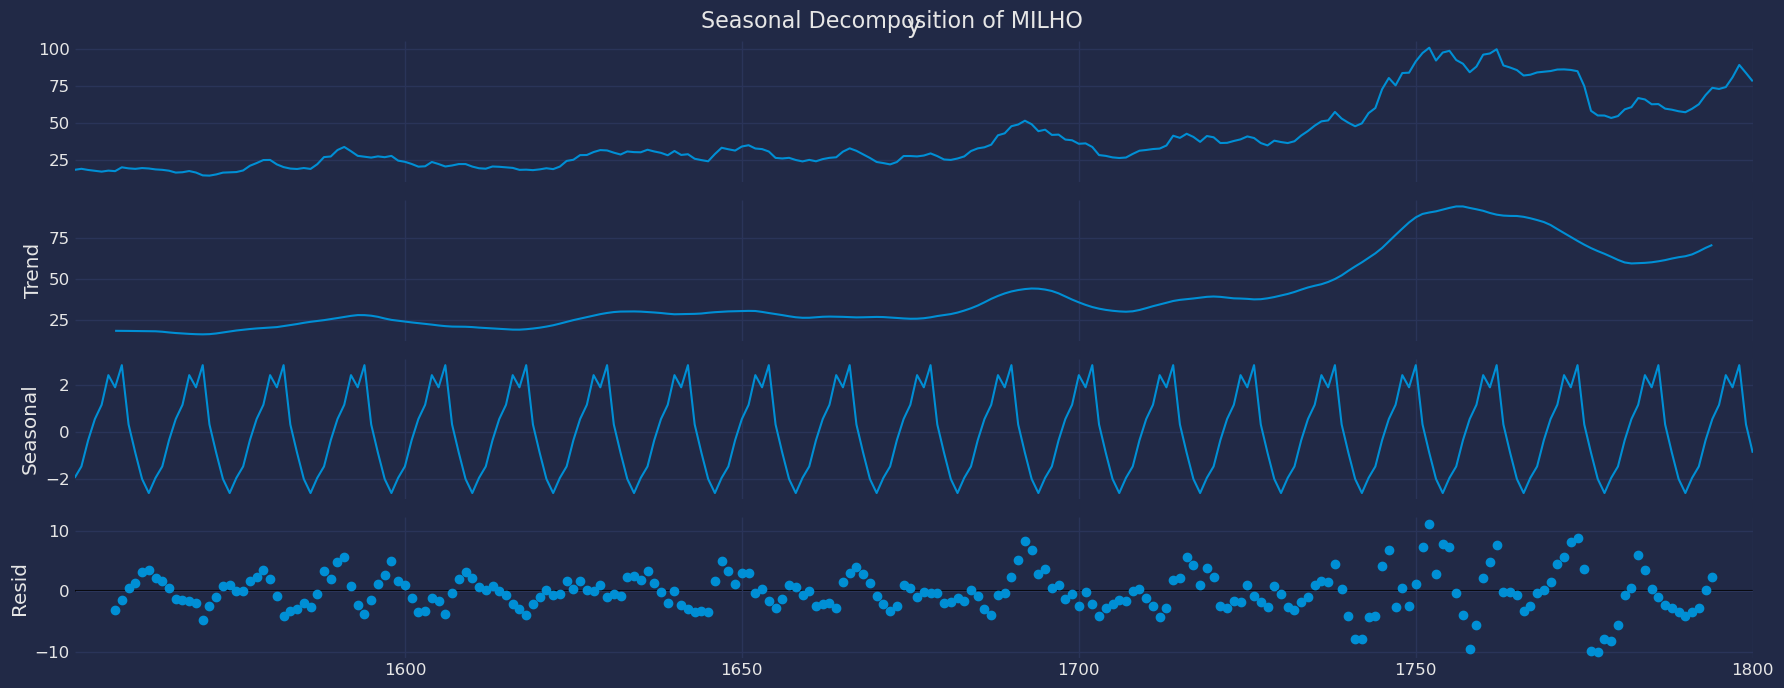

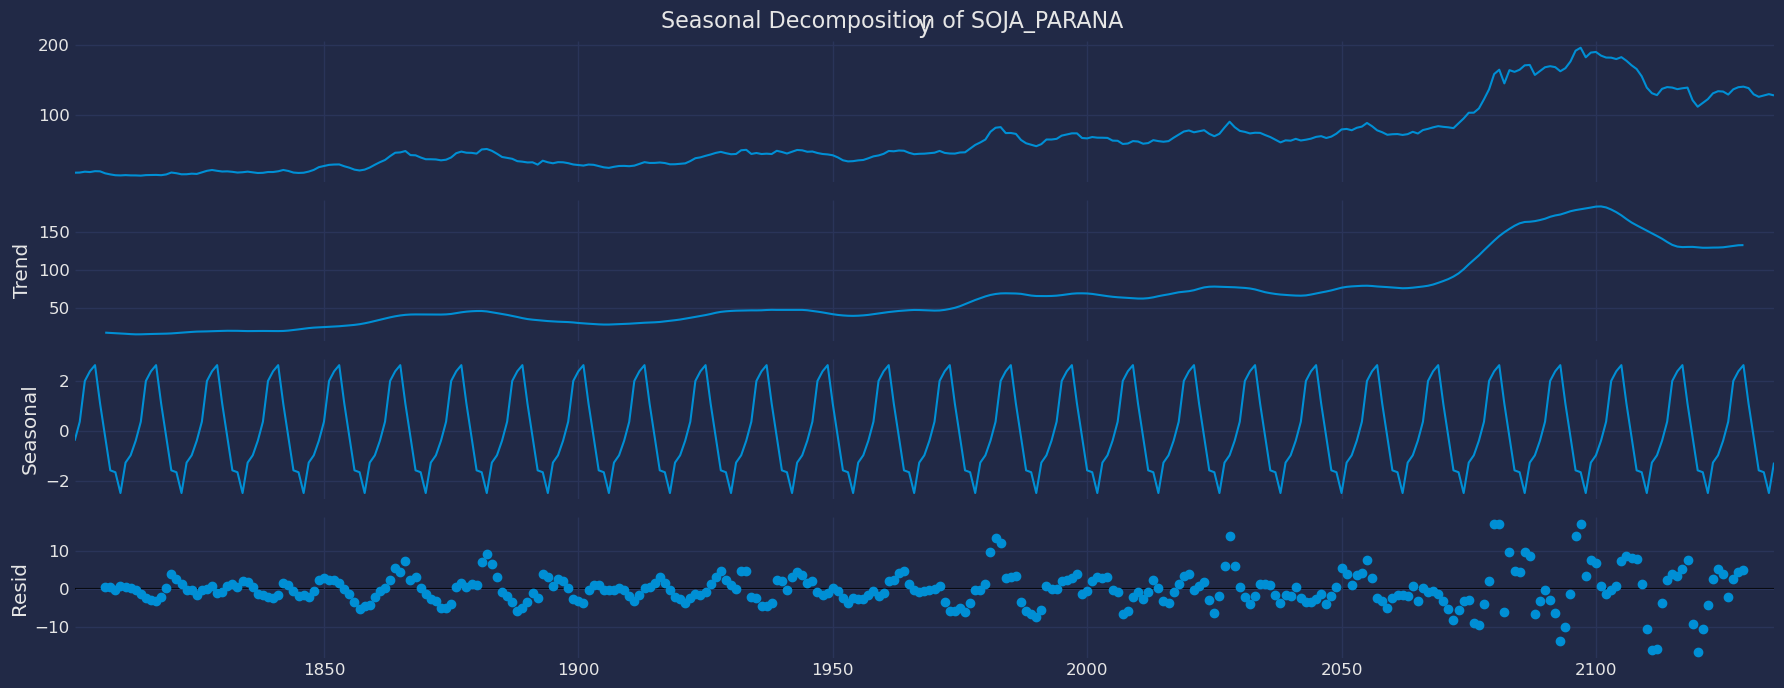

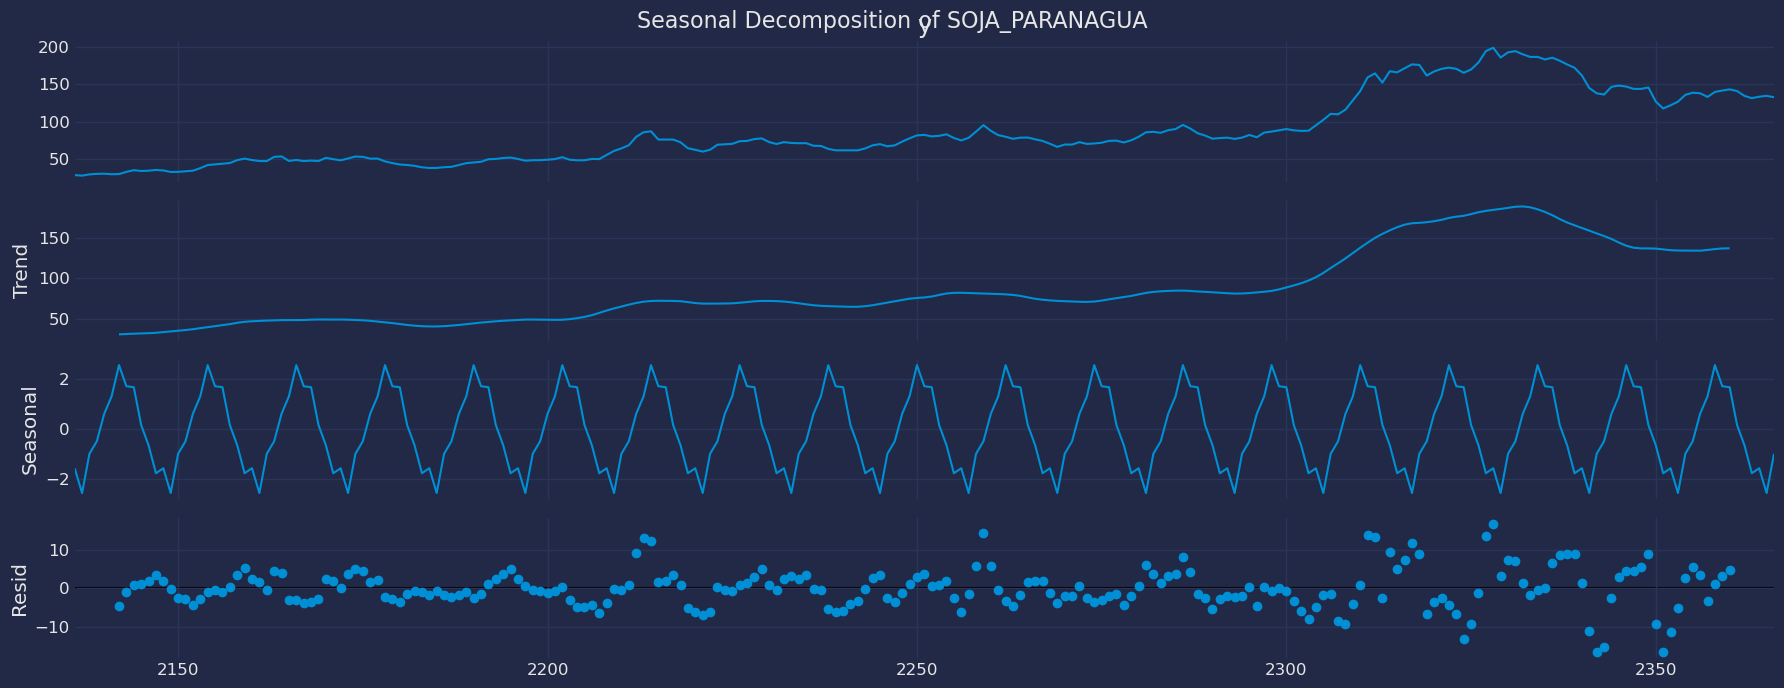

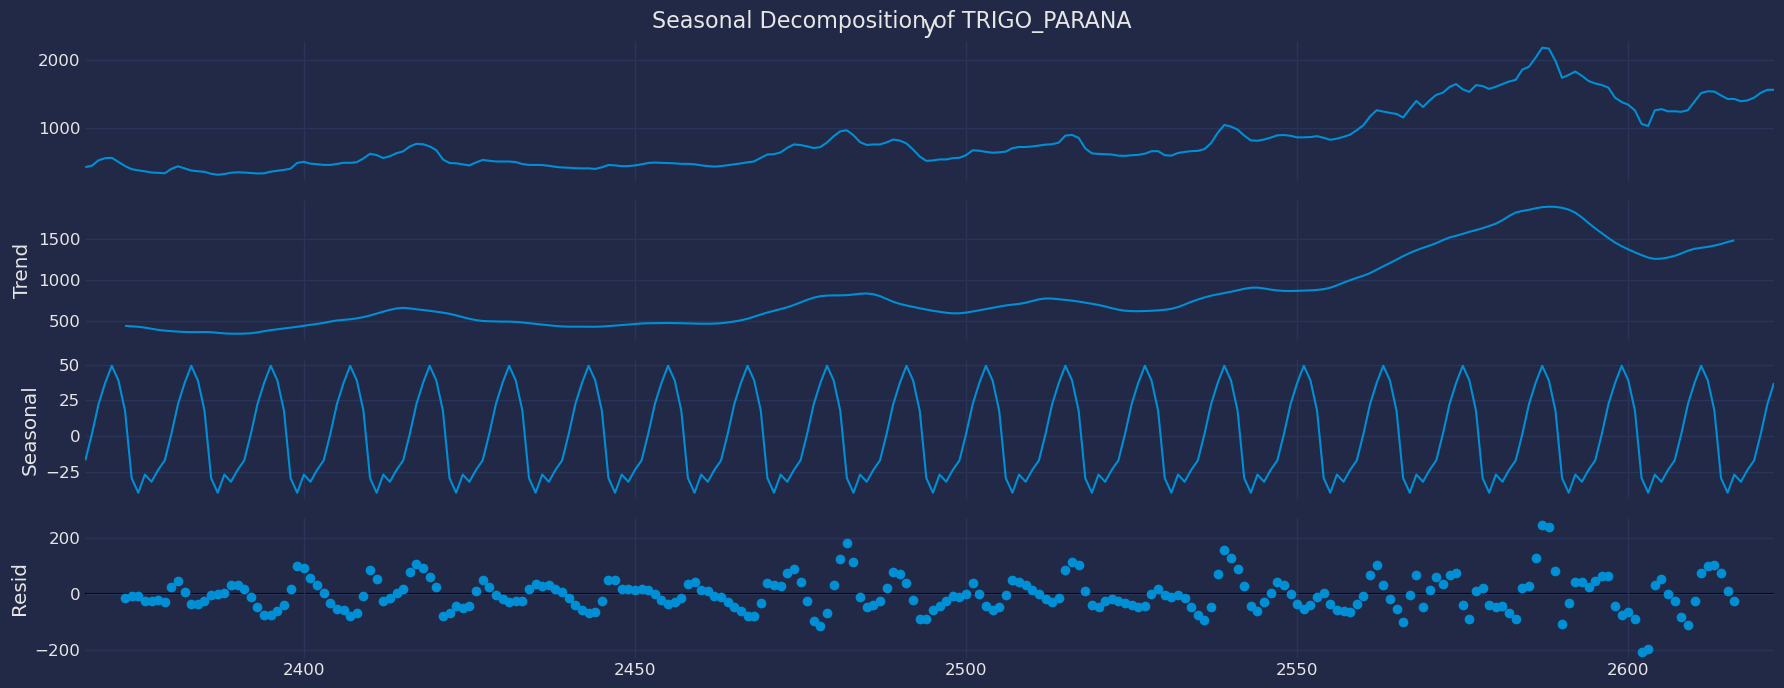

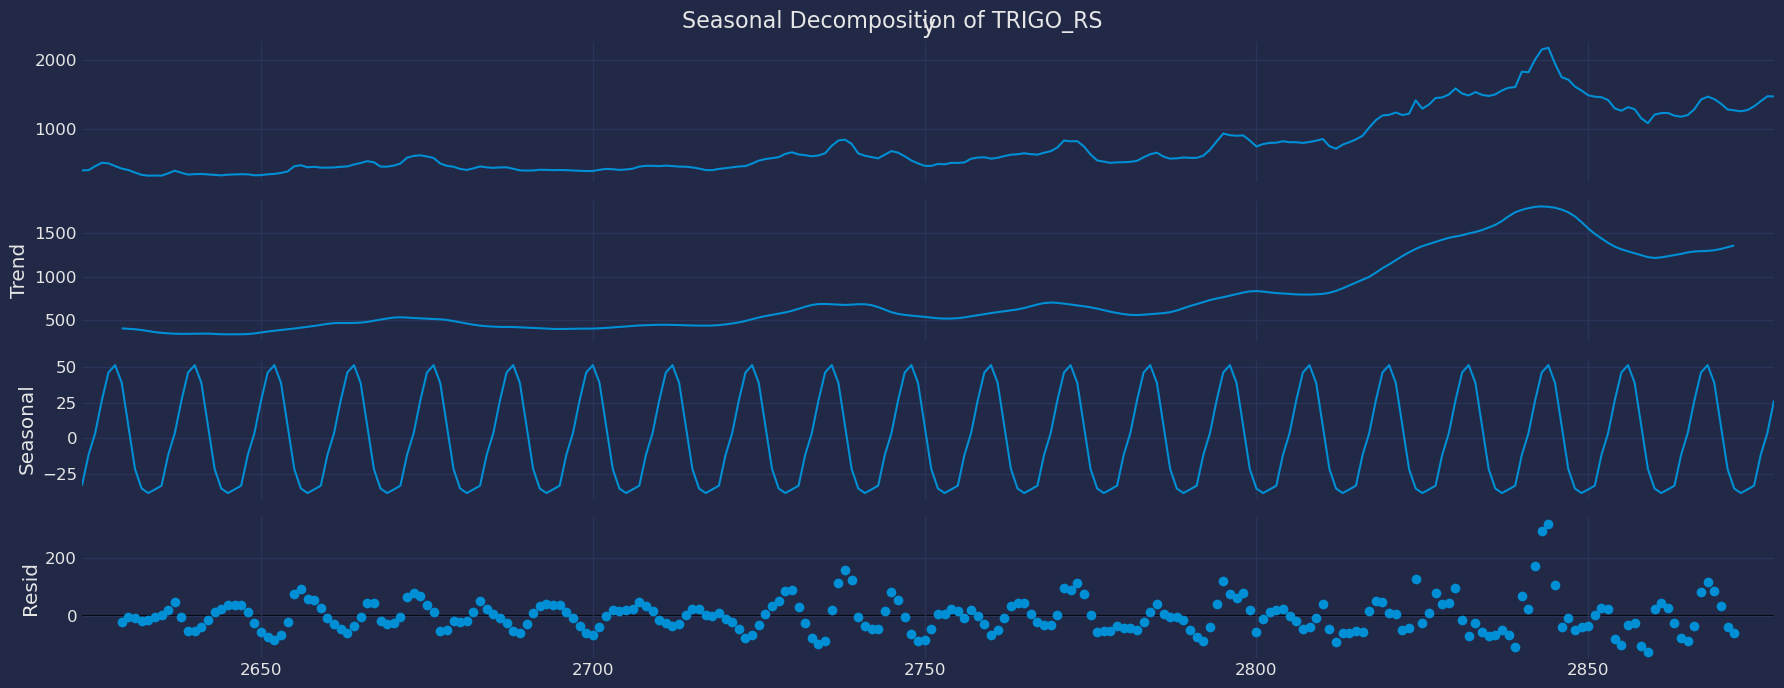

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose 

for u in df_brl['unique_id'].unique():
    a = seasonal_decompose(df_brl[df_brl['unique_id'] == u]["y"], model = "add", period=12)
    fig = a.plot()

    fig.suptitle(f"Seasonal Decomposition of {u}", fontsize=16)

    plt.show()

In [24]:
train, val, test = split_series(df_brl)
full_train = pd.concat([train, val])

Splitted data into TRAIN with size 1605, VALIDATION with size 406 and TEST with size 868


In [25]:
train.head()

ds          y      unique_id
0 2020-01-01  73.428636  ACUCAR_SANTOS
1 2020-02-01  81.636111  ACUCAR_SANTOS
2 2020-03-01  79.906364  ACUCAR_SANTOS
3 2020-04-01  77.113500  ACUCAR_SANTOS
4 2020-05-01  84.638500  ACUCAR_SANTOS

In [26]:
season_length = 12

models = [
    AutoARIMA(season_length=season_length),
    AutoETS(model='AZN')
]

In [27]:
sf = StatsForecast(models=models, freq='MS')

In [28]:
horizon = len(val)

sf.fit(df=train)

StatsForecast(models=[AutoARIMA,AutoETS])

In [29]:
arima_string(sf.fitted_[0,0].model_)

'ARIMA(0,1,0) with drift        '

In [30]:
Y_hat_val = sf.forecast(df=train, h=horizon, fitted=True)
Y_hat_val.head()

unique_id         ds   AutoARIMA     AutoETS
0  ACUCAR_SANTOS 2023-01-01  145.650447  145.146064
1  ACUCAR_SANTOS 2023-02-01  147.656609  147.100392
2  ACUCAR_SANTOS 2023-03-01  149.662770  149.054721
3  ACUCAR_SANTOS 2023-04-01  151.668931  151.009050
4  ACUCAR_SANTOS 2023-05-01  153.675093  152.963379

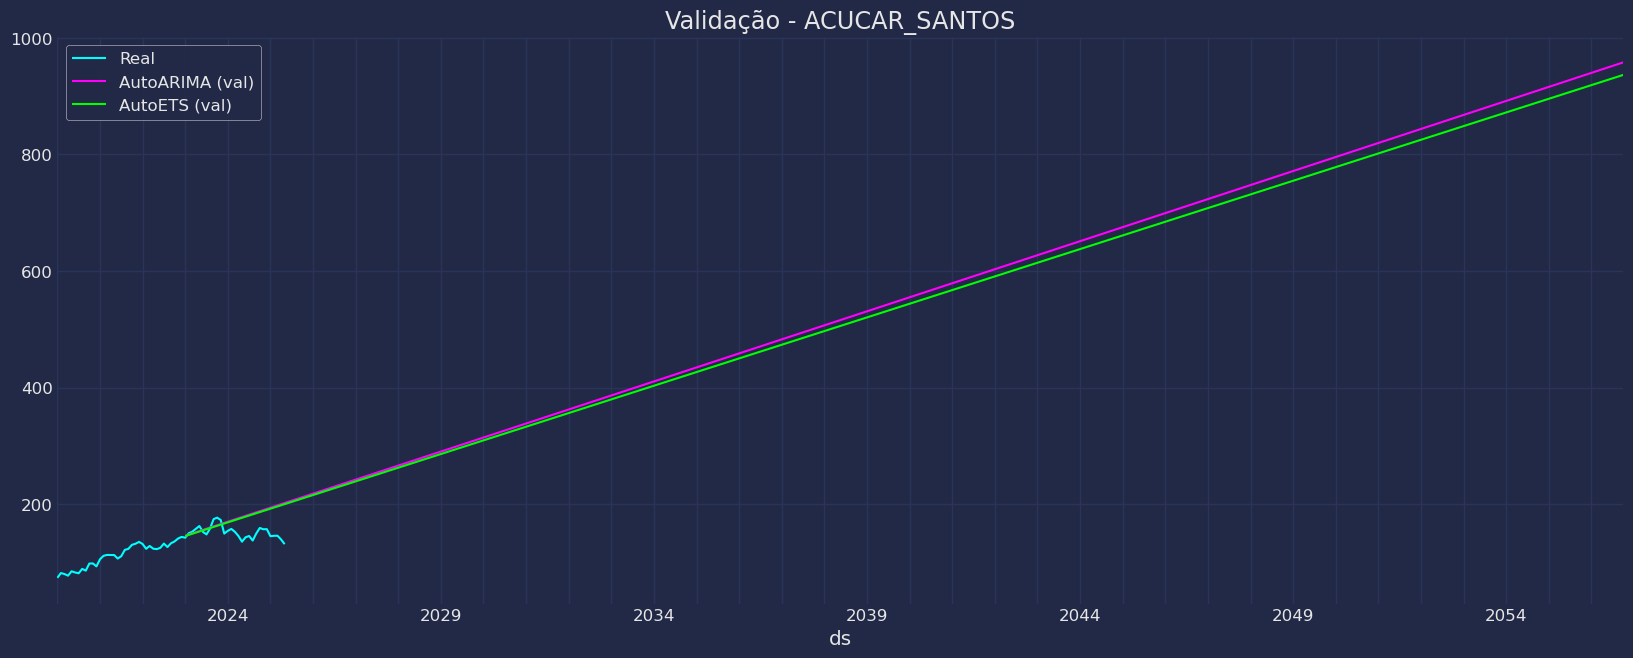

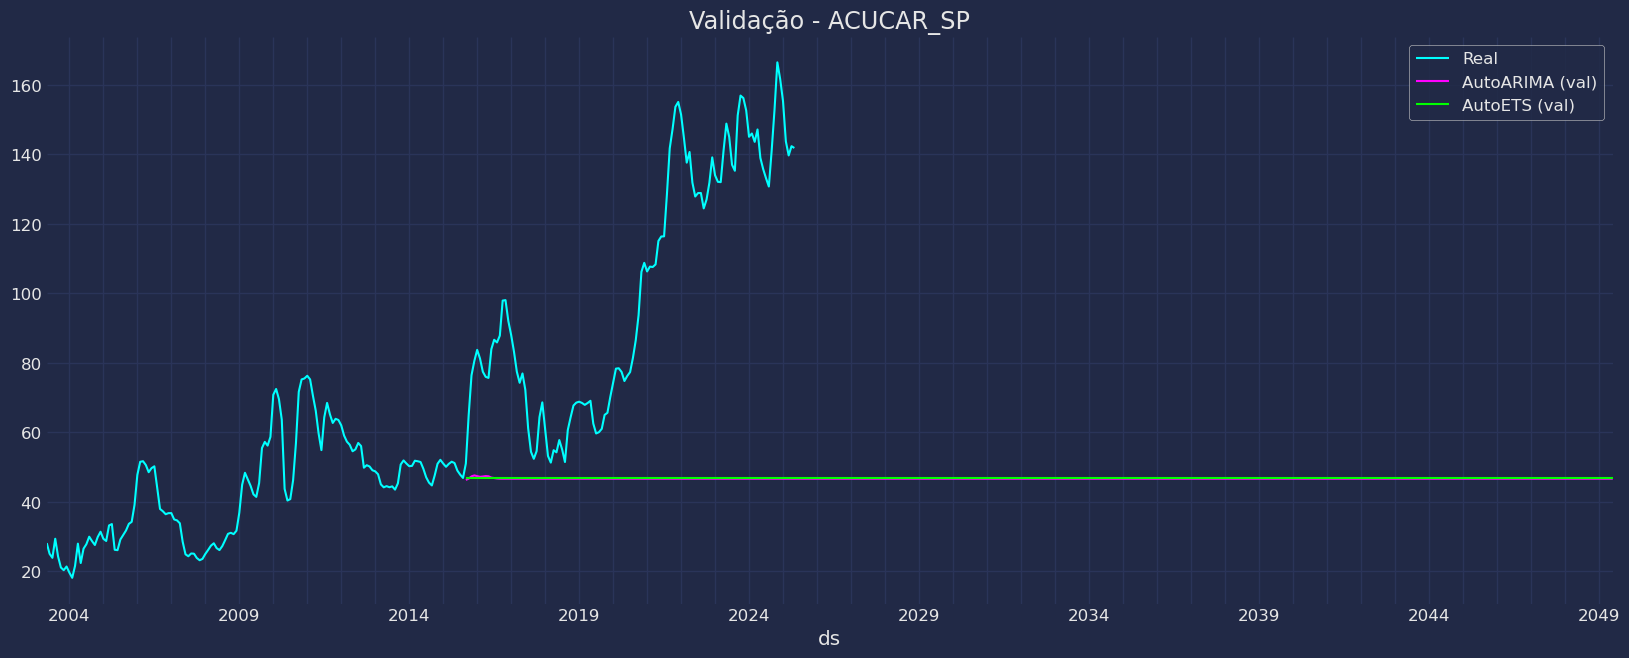

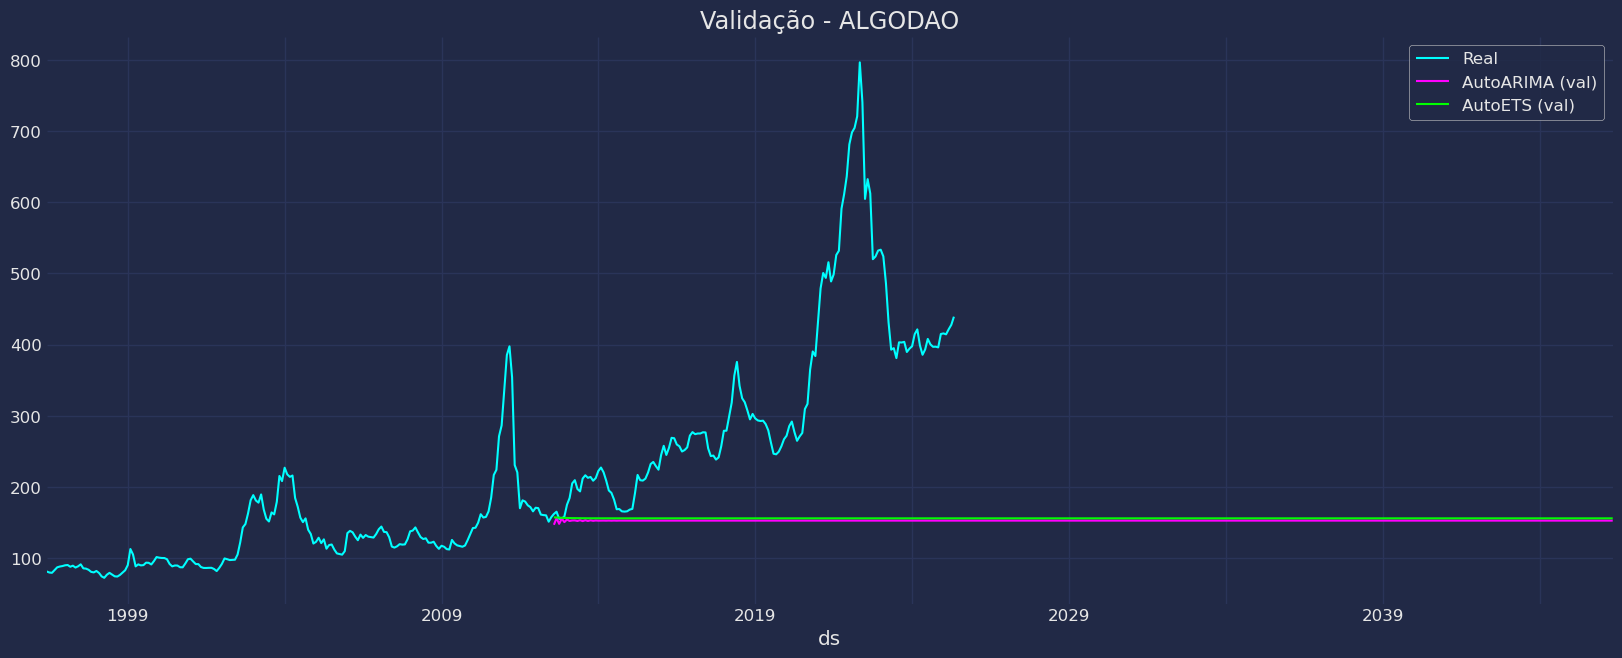

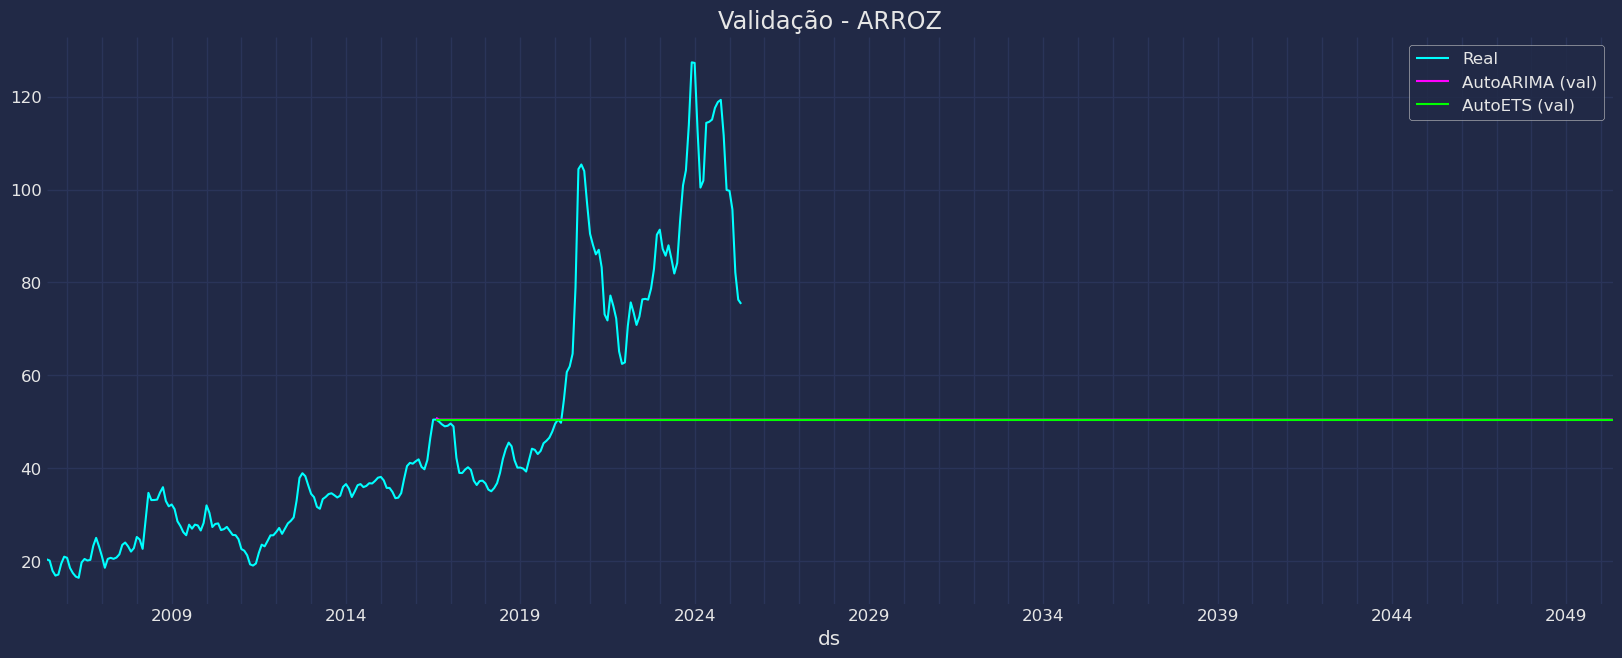

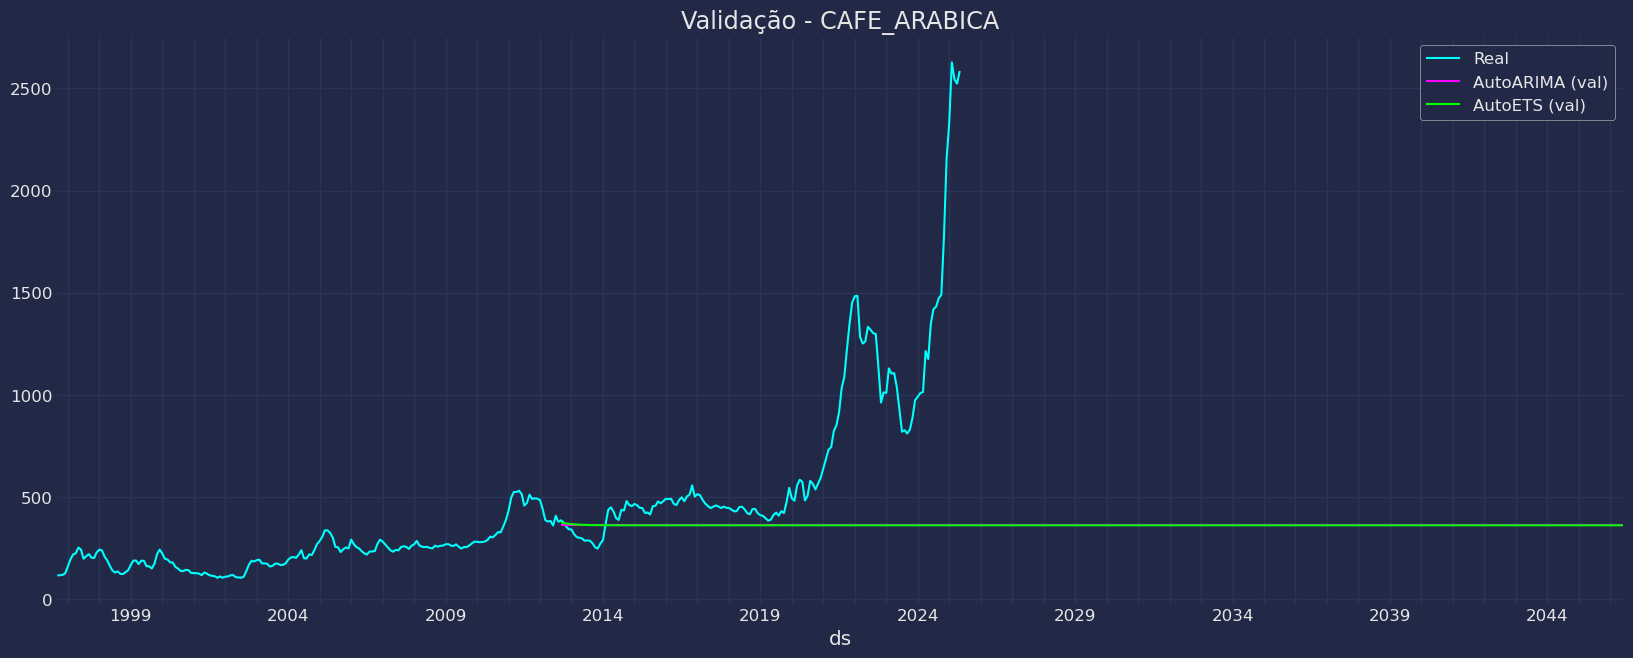

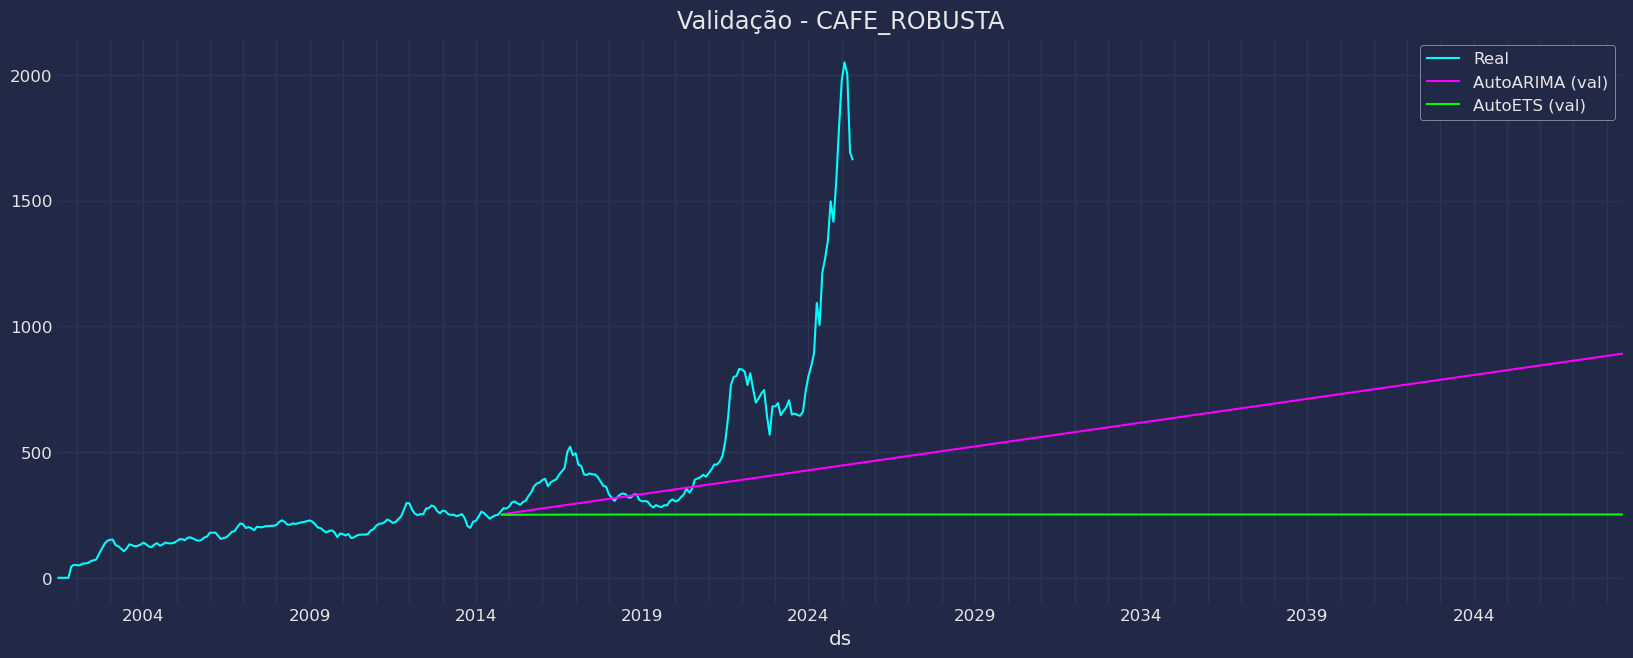

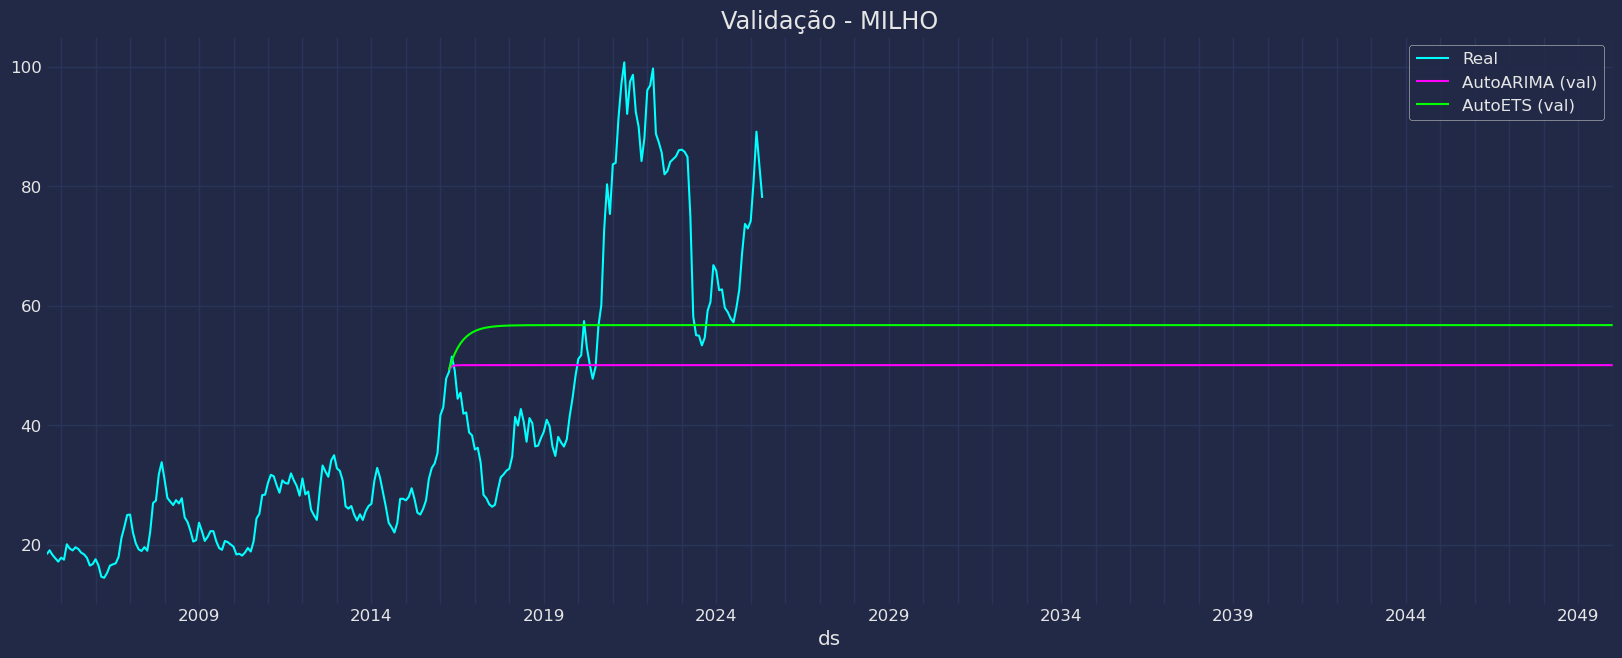

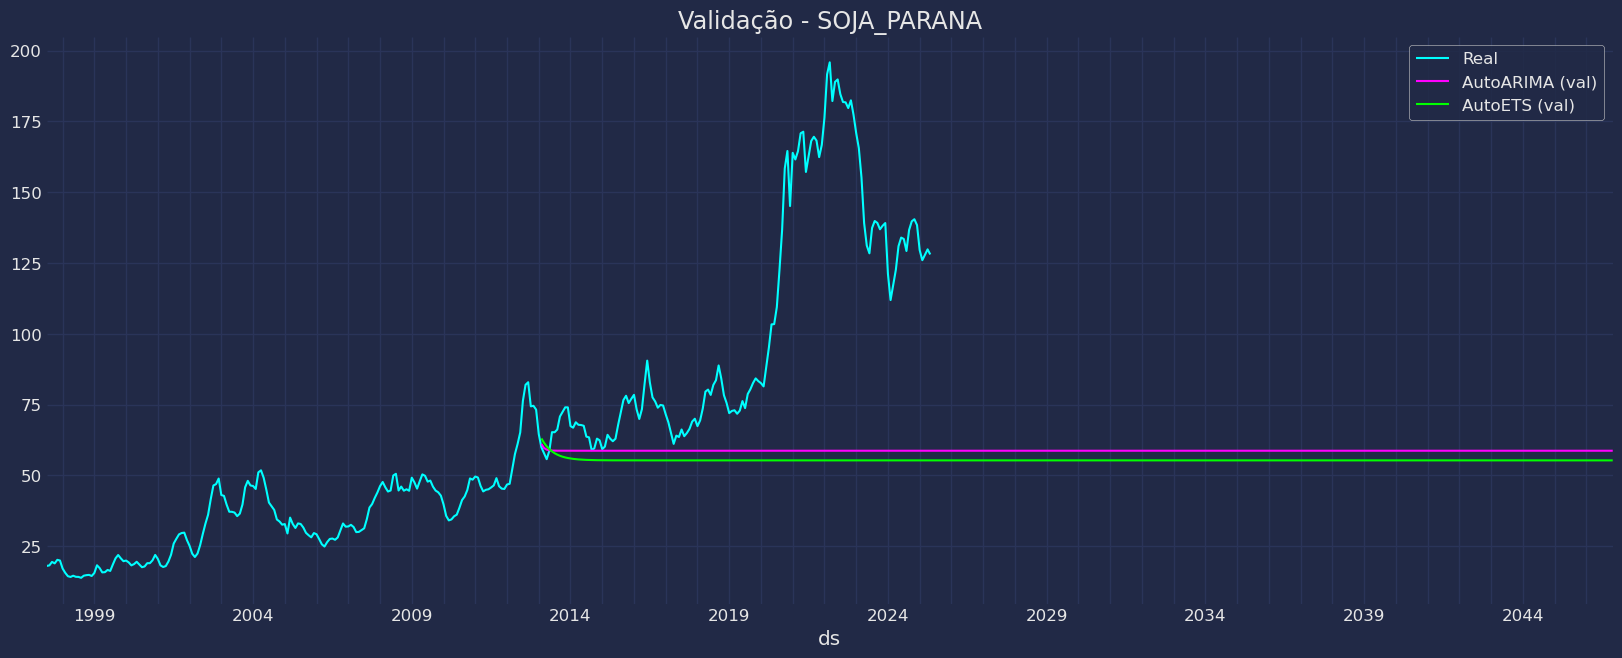

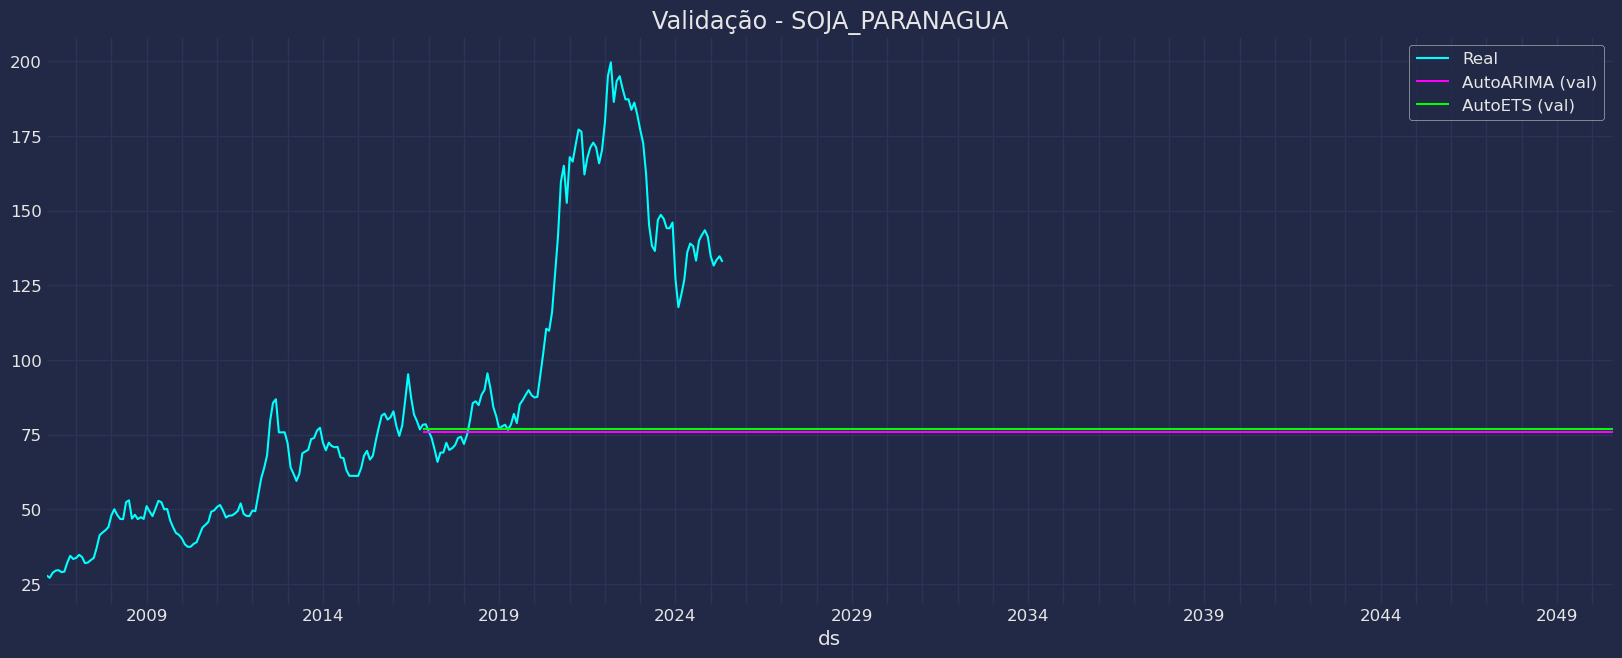

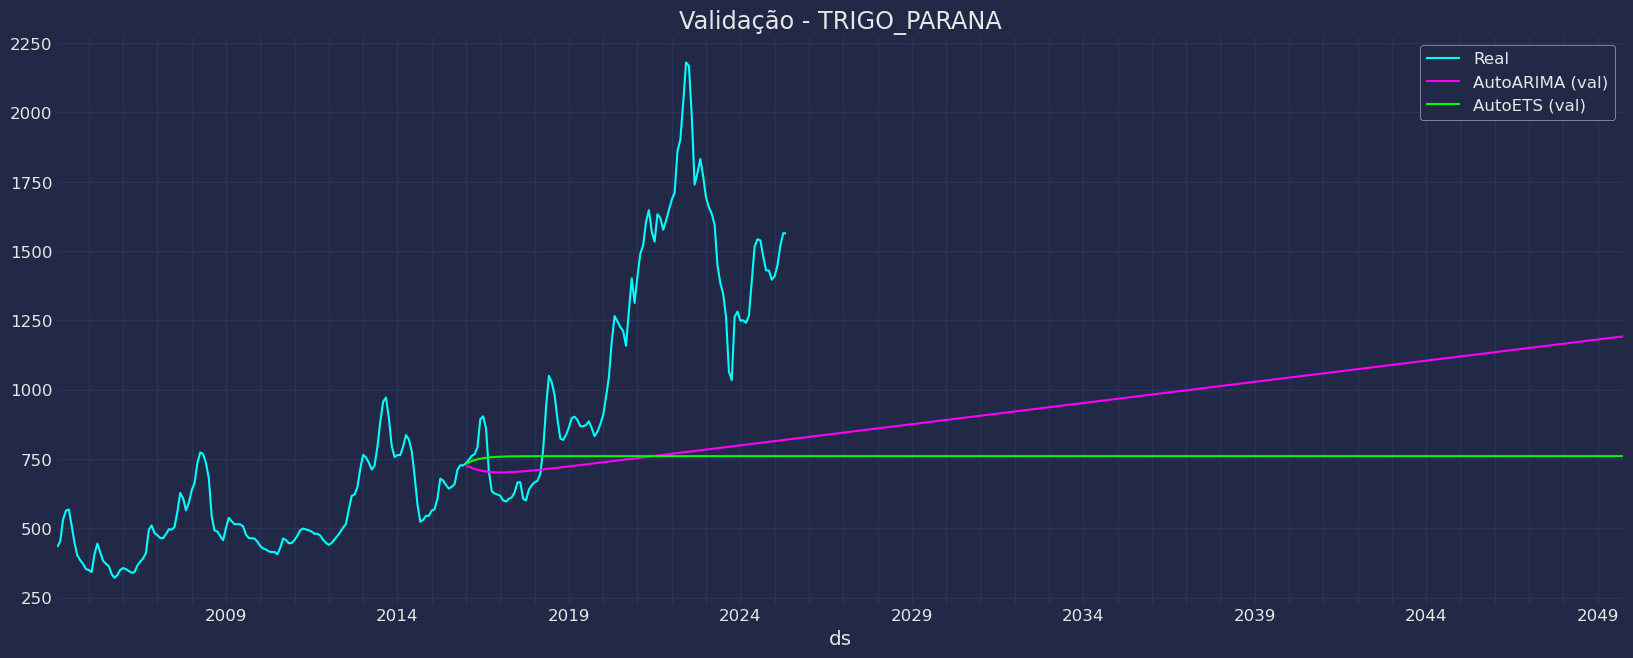

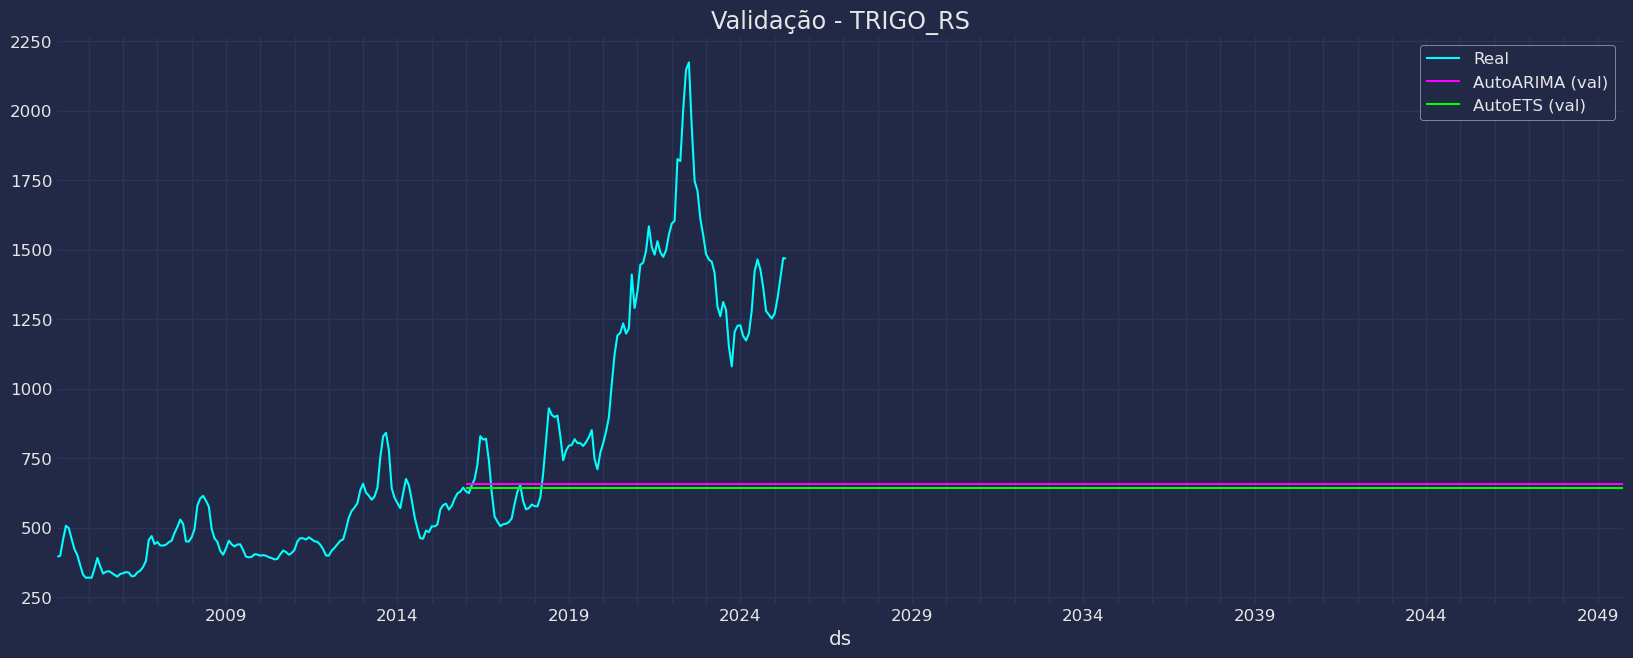

In [31]:
for u in df_brl['unique_id'].unique():
    fig, ax = plt.subplots(figsize=(18,7))

    # Série original
    df_brl[df_brl['unique_id'] == u].plot(x="ds", y="y", ax=ax, label="Real", color="cyan")

    # Previsão (validação)
    Y_hat_val[Y_hat_val['unique_id'] == u].plot(x="ds", y="AutoARIMA", ax=ax, label="AutoARIMA (val)", color="fuchsia")
    Y_hat_val[Y_hat_val['unique_id'] == u].plot(x="ds", y="AutoETS", ax=ax, label="AutoETS (val)", color="lime")

    ax.set_title(f"Validação - {u}")
    ax.legend()
    plt.show()

In [32]:
horizon = len(test)

sf.fit(df=full_train)

StatsForecast(models=[AutoARIMA,AutoETS])

In [33]:
Y_hat_test = sf.forecast(df=full_train, h=horizon, fitted=True)
Y_hat_test.head()

unique_id         ds   AutoARIMA     AutoETS
0  ACUCAR_SANTOS 2023-10-01  176.462645  173.515969
1  ACUCAR_SANTOS 2023-11-01  178.752289  175.731024
2  ACUCAR_SANTOS 2023-12-01  181.041934  177.946080
3  ACUCAR_SANTOS 2024-01-01  183.331579  180.161135
4  ACUCAR_SANTOS 2024-02-01  185.621223  182.376191

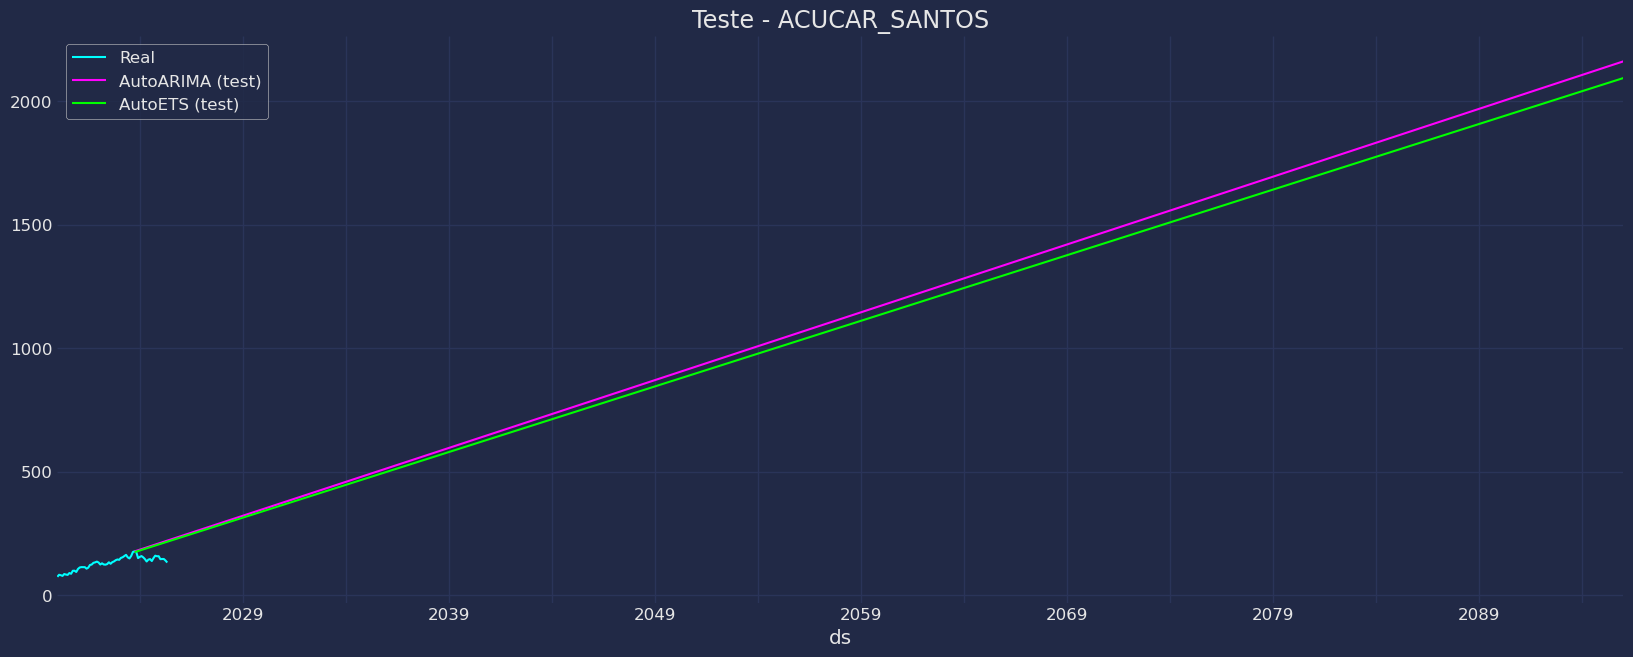

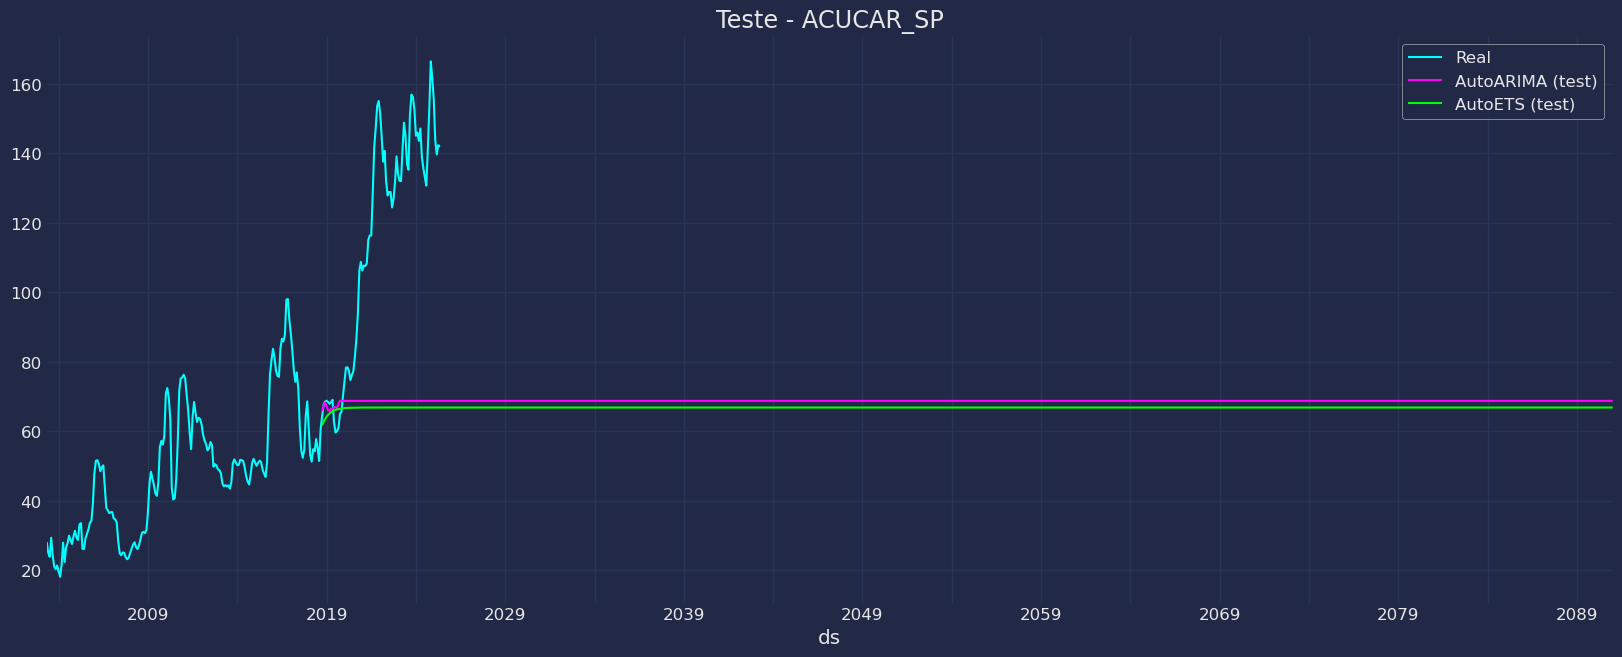

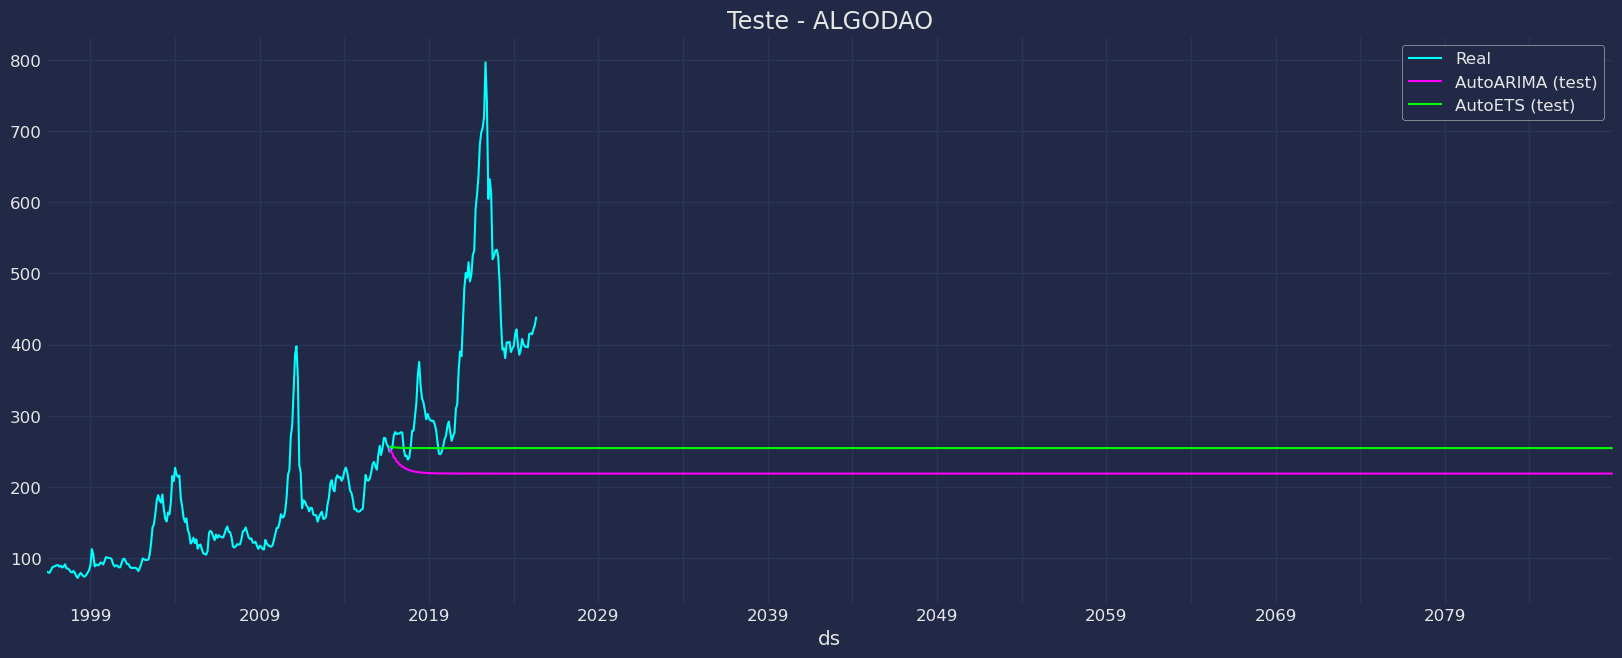

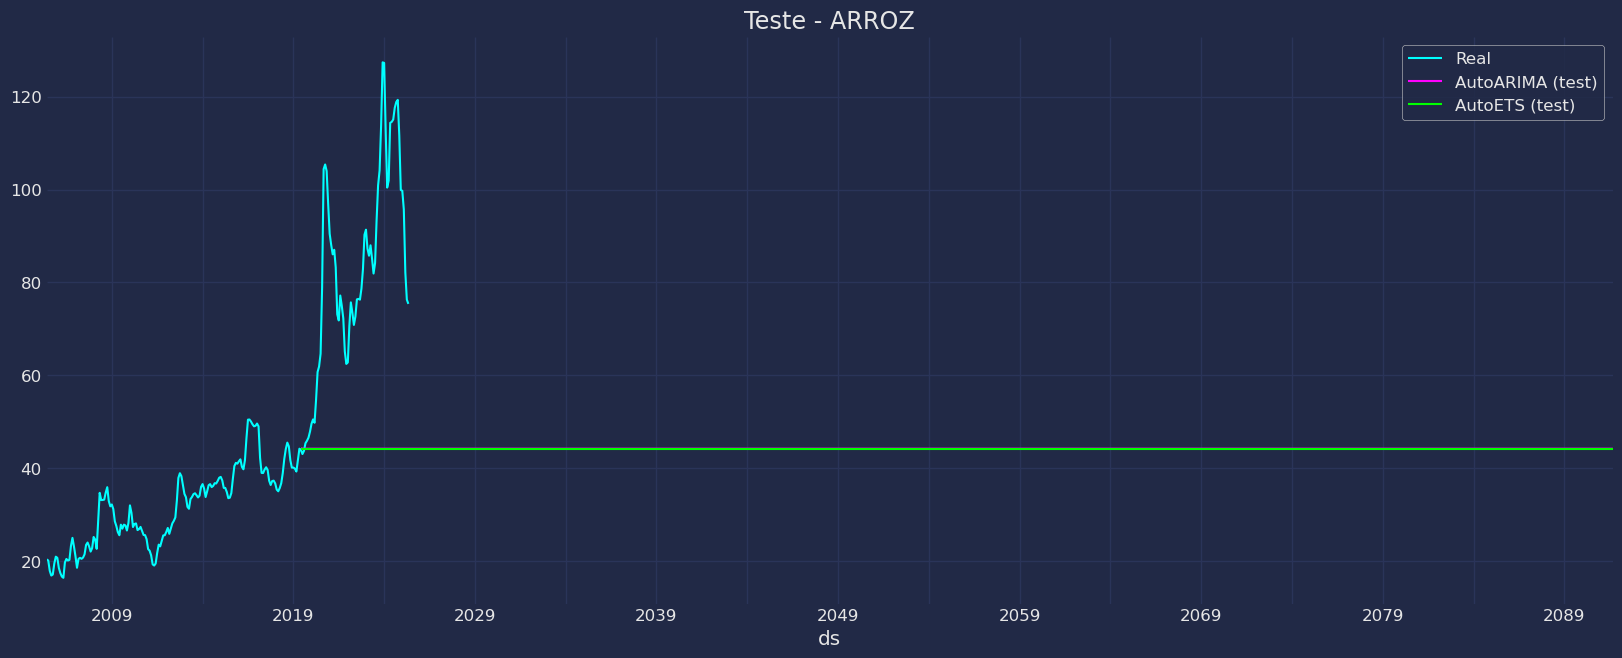

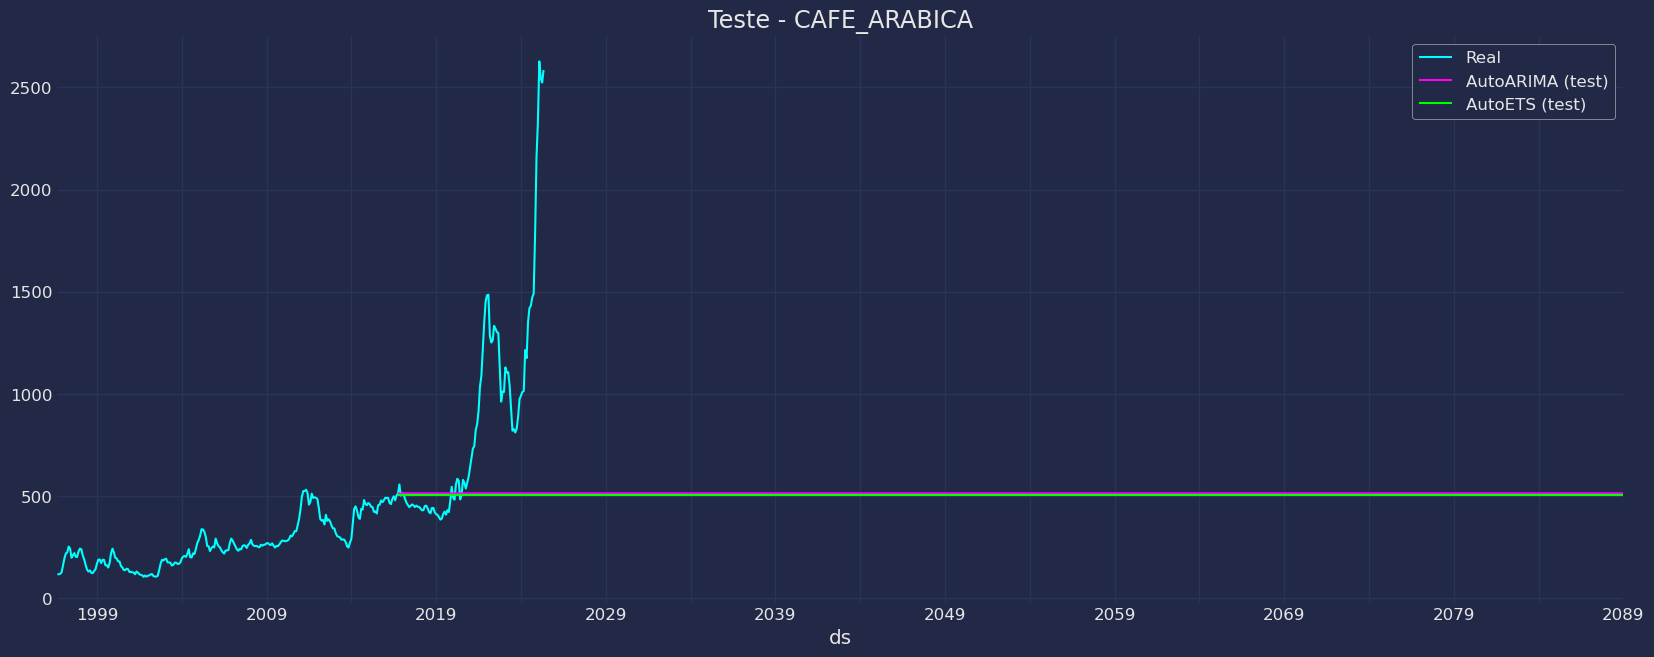

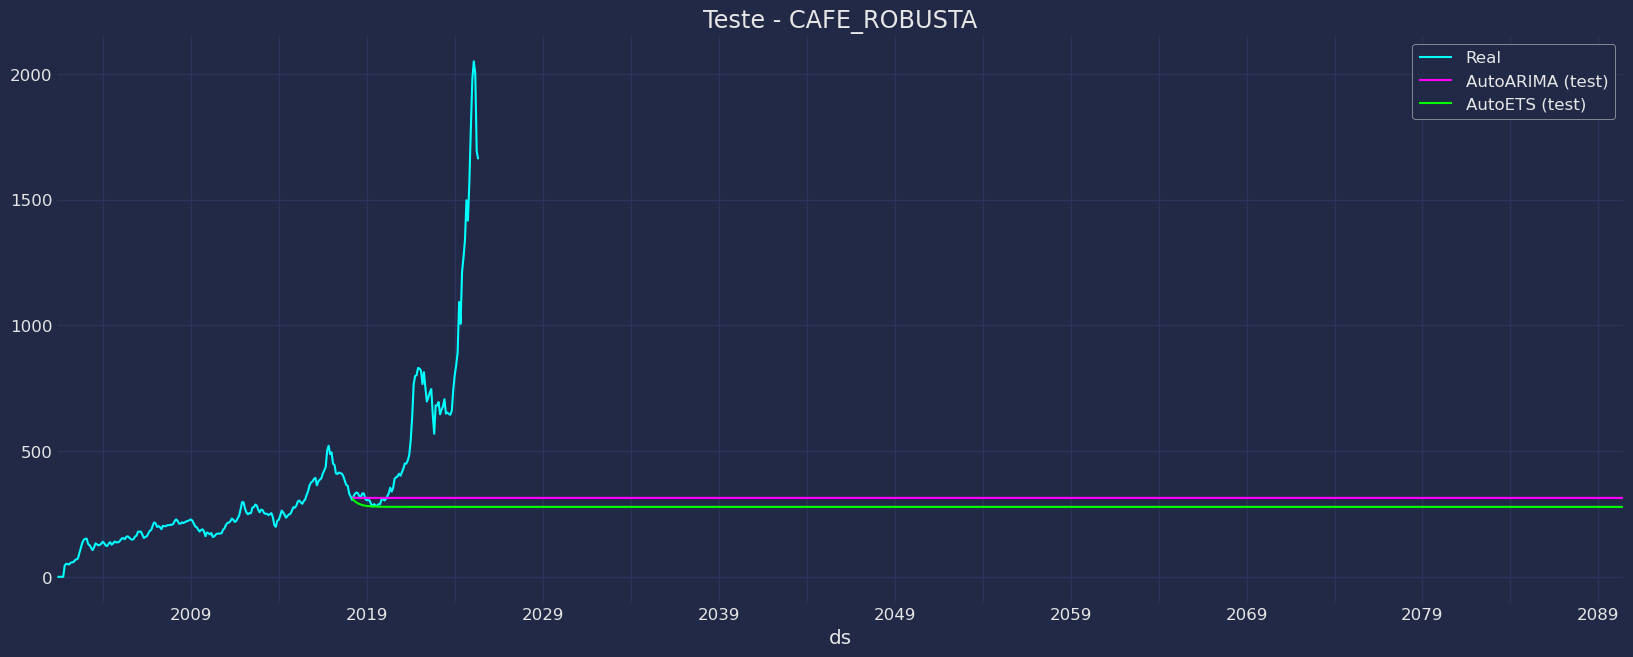

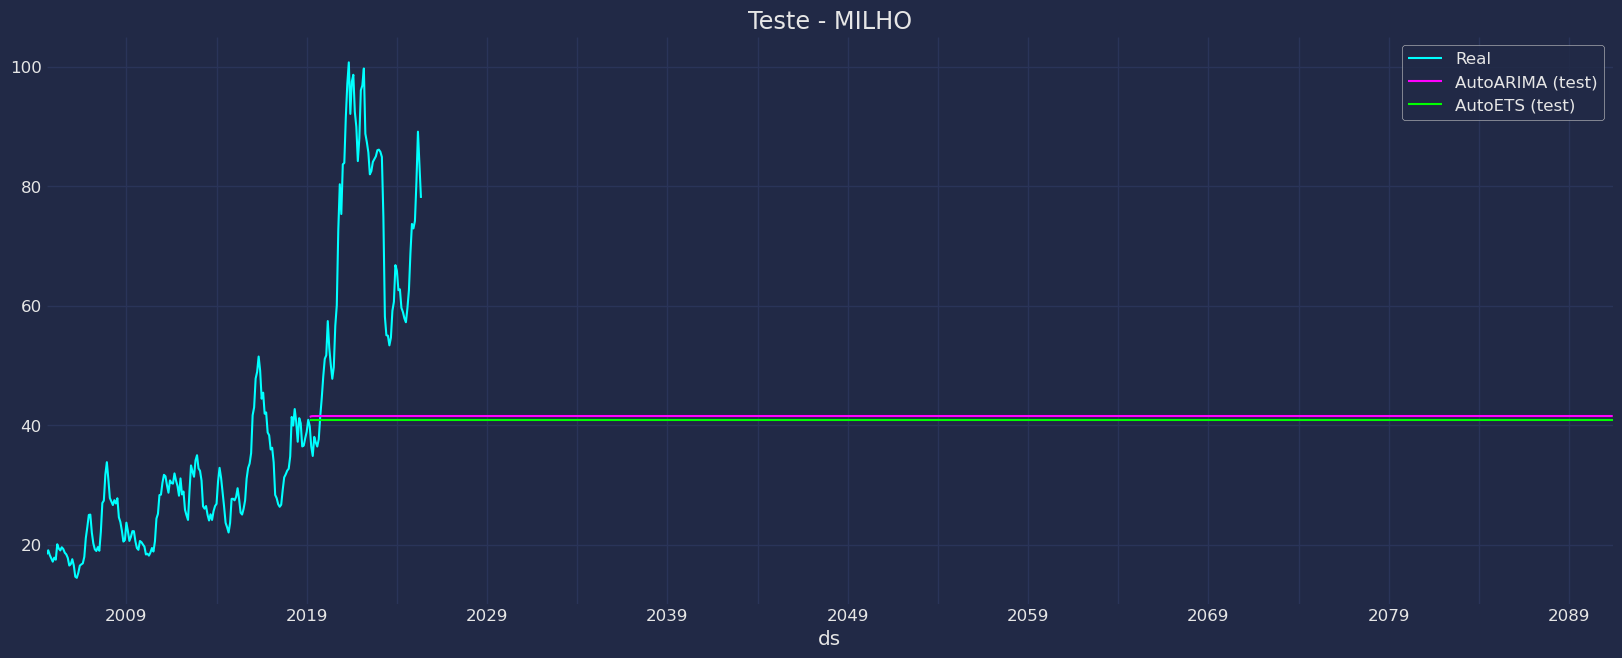

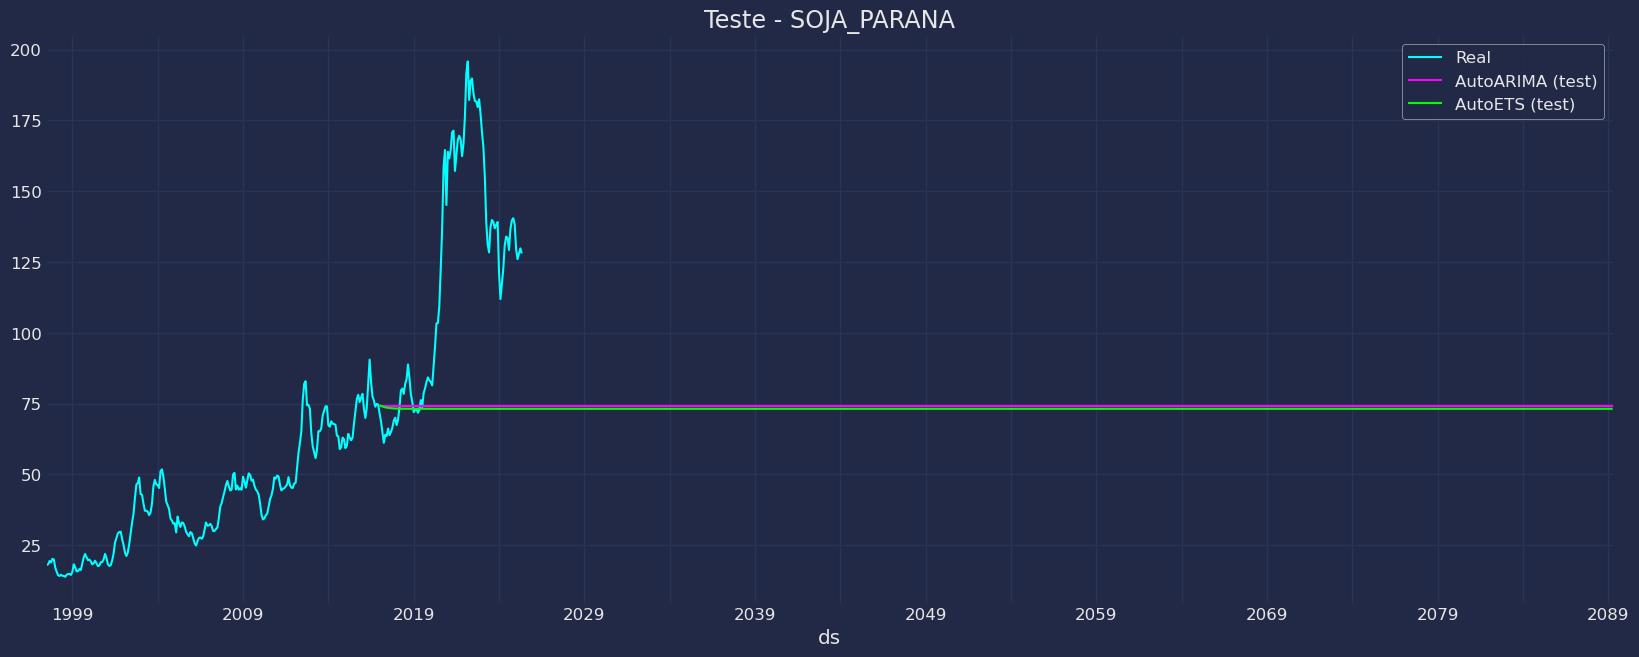

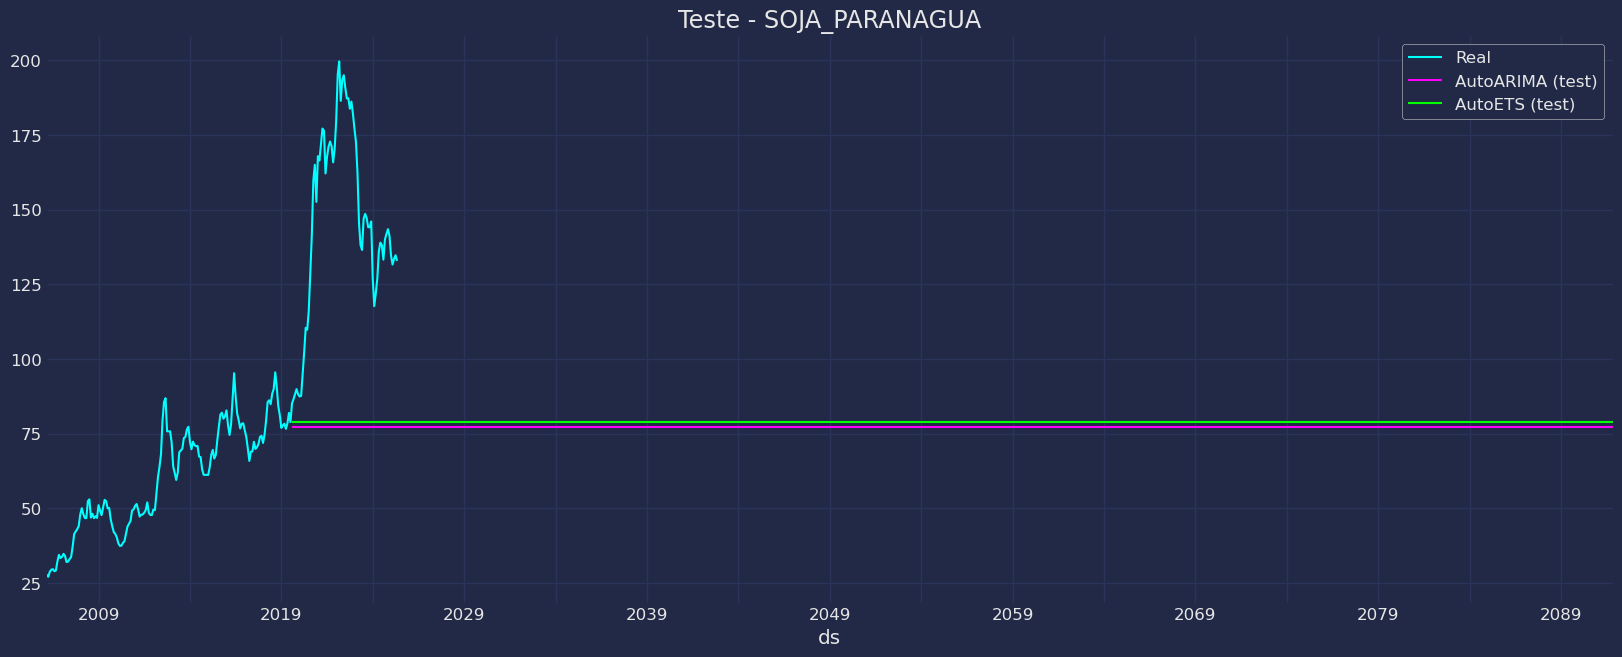

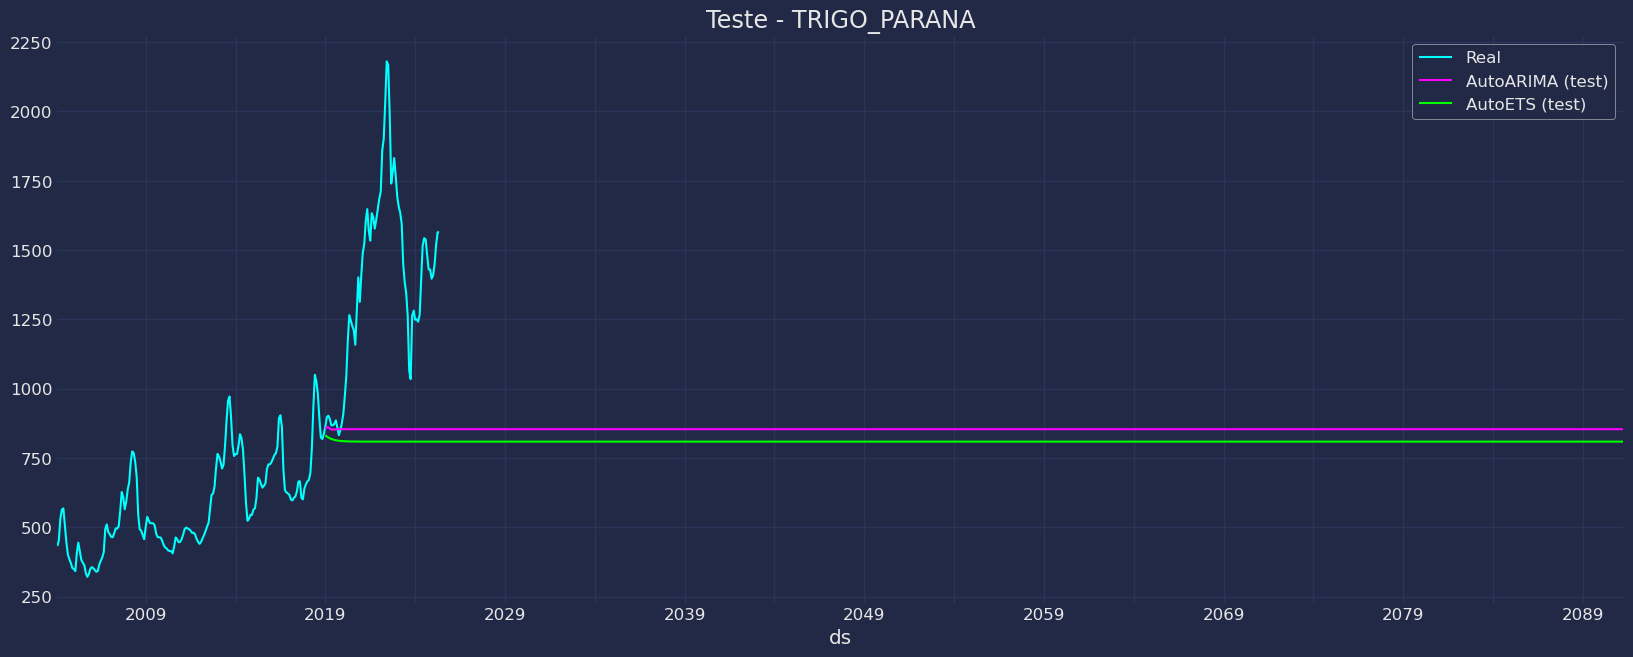

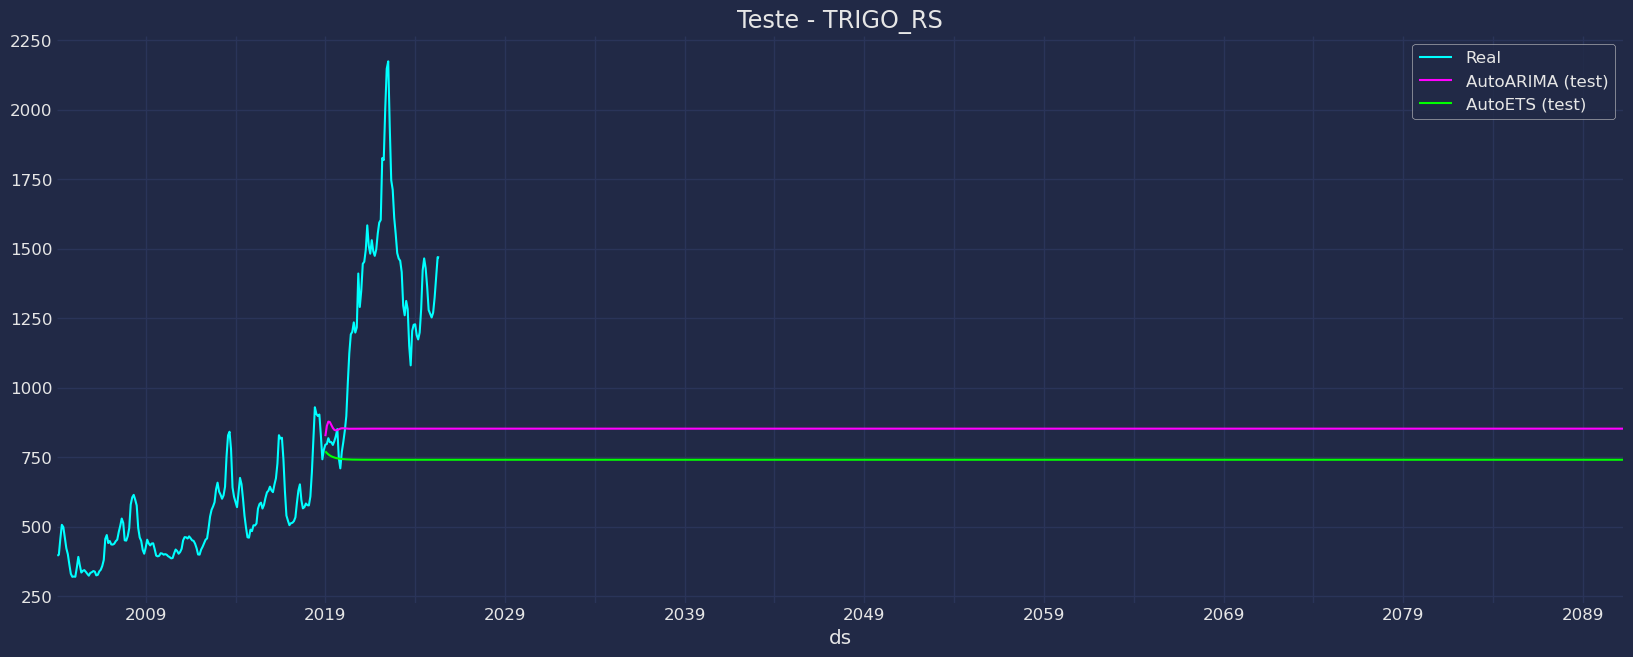

In [34]:
for u in df_brl['unique_id'].unique():
    fig, ax = plt.subplots(figsize=(18,7))

    # Série original
    df_brl[df_brl['unique_id'] == u].plot(x="ds", y="y", ax=ax, label="Real", color="cyan")

    # Previsão (teste)
    Y_hat_test[Y_hat_test['unique_id'] == u].plot(x="ds", y="AutoARIMA", ax=ax, label="AutoARIMA (test)", color="fuchsia")
    Y_hat_test[Y_hat_test['unique_id'] == u].plot(x="ds", y="AutoETS", ax=ax, label="AutoETS (test)", color="lime")

    ax.set_title(f"Teste - {u}")
    ax.legend()
    plt.show()